In [1]:
%pip install -r requirements.txt

Processing c:\b\abs_1c1a_vjay2\croot\aiobotocore_1682537737724\work (from -r requirements.txt (line 2))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_1c1a_vjay2\\croot\\aiobotocore_1682537737724\\work'



In [2]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install xgboost
# %pip install tensorflow
# %pip install keras
# %pip install torch
# %pip install optuna
# %pip install ipython
# %pip install imbalanced-learn
# %pip install cuda-python
# %pip install cupy-cuda12x

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, make_scorer
from sklearn.cluster import KMeans
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import torch

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('./caso_final_small_20k_con_mes.csv')

In [ ]:
df.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  \
0                     54.0  ...                   21.683399                0   
1                    152.0  ...                  166.050007              435   
2                      4.0  ...                  108.850102                0   
3                      0.0  ...                   65.799899                0   
4                    329.0  ...                  519.683305                1   

   KPI_IMPUESTOS  NUM_DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0       1.767800                    0                           100.0   
1       5.555000                    0                           100.0   
2       2.042002                    0                           100.0   
3       3.471001                    0                           100.0   
4       5.555000                    0                           100.0   

   SERVICIOS_TOTALES_MARCA  SERVICIOS_TOTALES_POSPAGO  MINUTOS_LLAMADAS_MOVIL  \
0                        2                          1                     0.0   
1                        1                          2                     0.0   
2                        2                          2                     0.0   
3                        2                          3                     0.0   
4                        1                          1                     0.0   

   PENETRACION_FIJO_ZONA  TARGET  
0               0.264612       0  
1               0.380171       0  
2               0.156041       0  
3               0.228810       1  
4               0.210286       1  

[5 rows x 36 columns]

In [ ]:
df.describe()

MES     MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  \
count   20000.000000   19741.000000                 19924.000000   
mean   201948.470400   12307.320625                    40.939452   
std        49.255692   20115.499610                    30.326117   
min    201901.000000       0.000000                    -0.002000   
25%    201905.000000    1929.673340                    24.999000   
50%    201911.000000    5931.522949                    33.004000   
75%    202005.000000   16013.454310                    50.124250   
max    202011.000000  853613.593750                  1246.438000   

       FACTURACION_CUOTA  SEGUNDOS_LLAMADA_RED_PROPIA  \
count       19924.000000                 19843.000000   
mean           25.179305                 19282.843471   
std            13.067181                 31773.406451   
min             0.000000                     0.000000   
25%            15.700000                  1777.000000   
50%            23.969999                  8011.000000   
75%            26.460000                 23009.500000   
max           133.890000                584239.000000   

       SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
count                          19843.000000   
mean                           10334.947941   
std                            18971.928733   
min                                0.000000   
25%                              705.500000   
50%                             3631.000000   
75%                            11846.500000   
max                           422724.000000   

       SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   MB_MENSUALES          EDAD  \
count                          19843.000000   19749.000000  19971.000000   
mean                              62.941239   12288.026161     43.990937   
std                               93.528782   20112.795794     14.125926   
min                                0.000000       0.000000     17.000000   
25%                               11.000000    1915.529785     33.000000   
50%                               36.000000    5898.413086     43.000000   
75%                               82.000000   15967.201660     54.000000   
max                             6220.000000  853613.593750     98.000000   

       NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  \
count             19843.000000  ...                19749.000000   
mean                156.408456  ...                  361.817034   
std                 227.913588  ...                  543.391221   
min                   0.000000  ...                    0.000000   
25%                  29.000000  ...                   64.999998   
50%                  87.000000  ...                  178.966798   
75%                 199.000000  ...                  443.583287   
max               12497.000000  ...                12316.250395   

       NUM_DIAS_BUNDLE  KPI_IMPUESTOS  NUM_DESACTIVACIONES  \
count     20000.000000   19924.000000          20000.00000   
mean        148.792200       5.657482              0.00785   
std         476.199046       3.552509              0.10435   
min           0.000000      -1.190000              0.00000   
25%           0.000000       3.297000              0.00000   
50%           1.000000       5.034000              0.00000   
75%           2.000000       6.768002              0.00000   
max        4056.000000      93.483509              4.00000   

       PORCENTAJE_SEGUNDOS_RED_PROPIA  SERVICIOS_TOTALES_MARCA  \
count                    19737.000000             20000.000000   
mean                        99.975217                 1.432750   
std                          1.284268                 0.756972   
min                          0.000000                 1.000000   
25%                        100.000000                 1.000000   
50%                        100.000000                 1.000000   
75%                        100.000000                 2.000000   
max                        100.000000                 8.000000   

       SERVICIOS_TOTALE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

In [ ]:
df.isnull().sum()

MES                                        0
MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
MB_MENSUALES                             251
EDAD                                      29
NUM_LLAMADAS_RED_PROPIA                  157
FACTURACION_TOTAL_SIN_IMPUESTOS           76
NUM_LINEAS_PRIN_POSPAGO                    0
NUM_LINEAS_POSPAGO                         0
NUM_LINEAS_FIJAS                           0
NUM_DIAS_CONVERGENTE                       0
NUM_LINEAS_FIJAS_POSPAGO                   0
NUM_SERVICIOS_POSPAGO                      0
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
LLAMADAS_MOVILES                          82
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DESACT

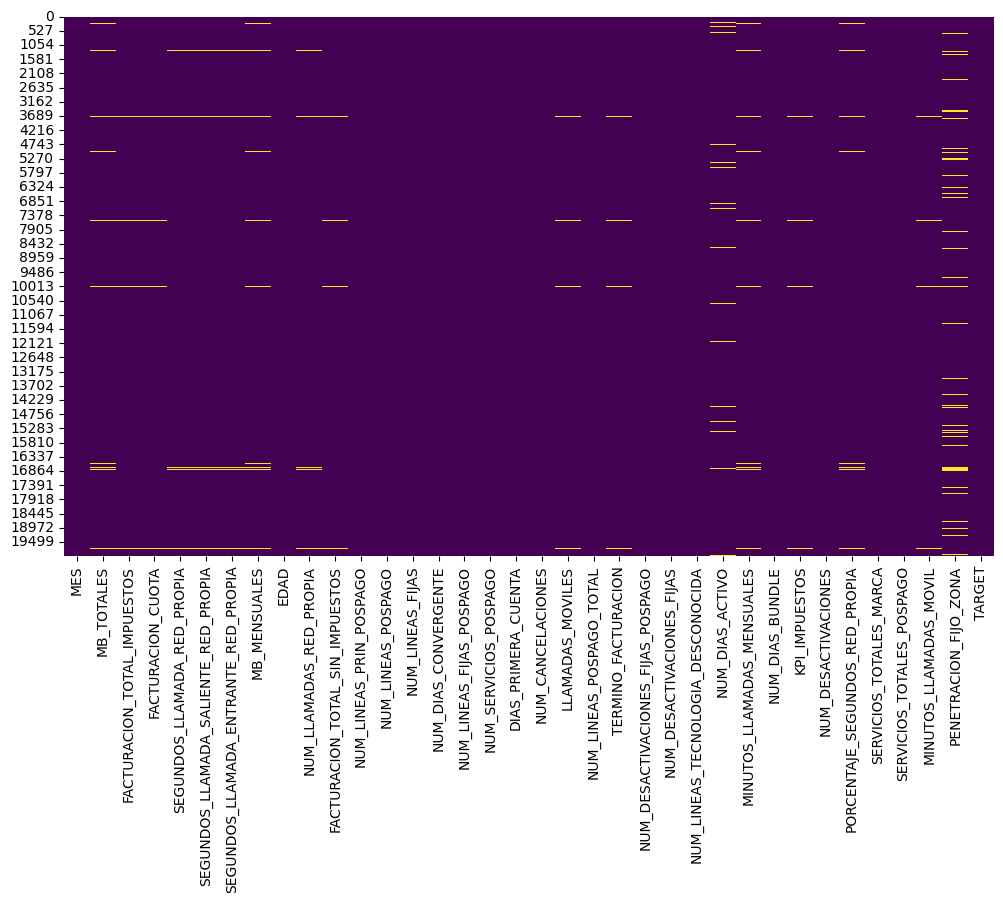

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
imputer = IterativeImputer(max_iter=10000, random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
    return outliers

outliers = detect_outliers(df_imputed)
outliers

{'MES': 0,
 'MB_TOTALES': 1326,
 'FACTURACION_TOTAL_IMPUESTOS': 1042,
 'FACTURACION_CUOTA': 1791,
 'SEGUNDOS_LLAMADA_RED_PROPIA': 1824,
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA': 1915,
 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA': 1397,
 'MB_MENSUALES': 1327,
 'EDAD': 40,
 'NUM_LLAMADAS_RED_PROPIA': 1443,
 'FACTURACION_TOTAL_SIN_IMPUESTOS': 1019,
 'NUM_LINEAS_PRIN_POSPAGO': 2675,
 'NUM_LINEAS_POSPAGO': 423,
 'NUM_LINEAS_FIJAS': 21,
 'NUM_DIAS_CONVERGENTE': 654,
 'NUM_LINEAS_FIJAS_POSPAGO': 21,
 'NUM_SERVICIOS_POSPAGO': 423,
 'DIAS_PRIMERA_CUENTA': 101,
 'NUM_CANCELACIONES': 1475,
 'LLAMADAS_MOVILES': 124,
 'NUM_LINEAS_POSPAGO_TOTAL': 1966,
 'TERMINO_FACTURACION': 2446,
 'NUM_DESACTIVACIONES_FIJAS_POSPAGO': 47,
 'NUM_DESACTIVACIONES_FIJAS': 47,
 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA': 423,
 'NUM_DIAS_ACTIVO': 134,
 'MINUTOS_LLAMADAS_MENSUALES': 1621,
 'NUM_DIAS_BUNDLE': 3133,
 'KPI_IMPUESTOS': 988,
 'NUM_DESACTIVACIONES': 132,
 'PORCENTAJE_SEGUNDOS_RED_PROPIA': 293,
 'SERVICIOS_TOTALES_MARCA': 54

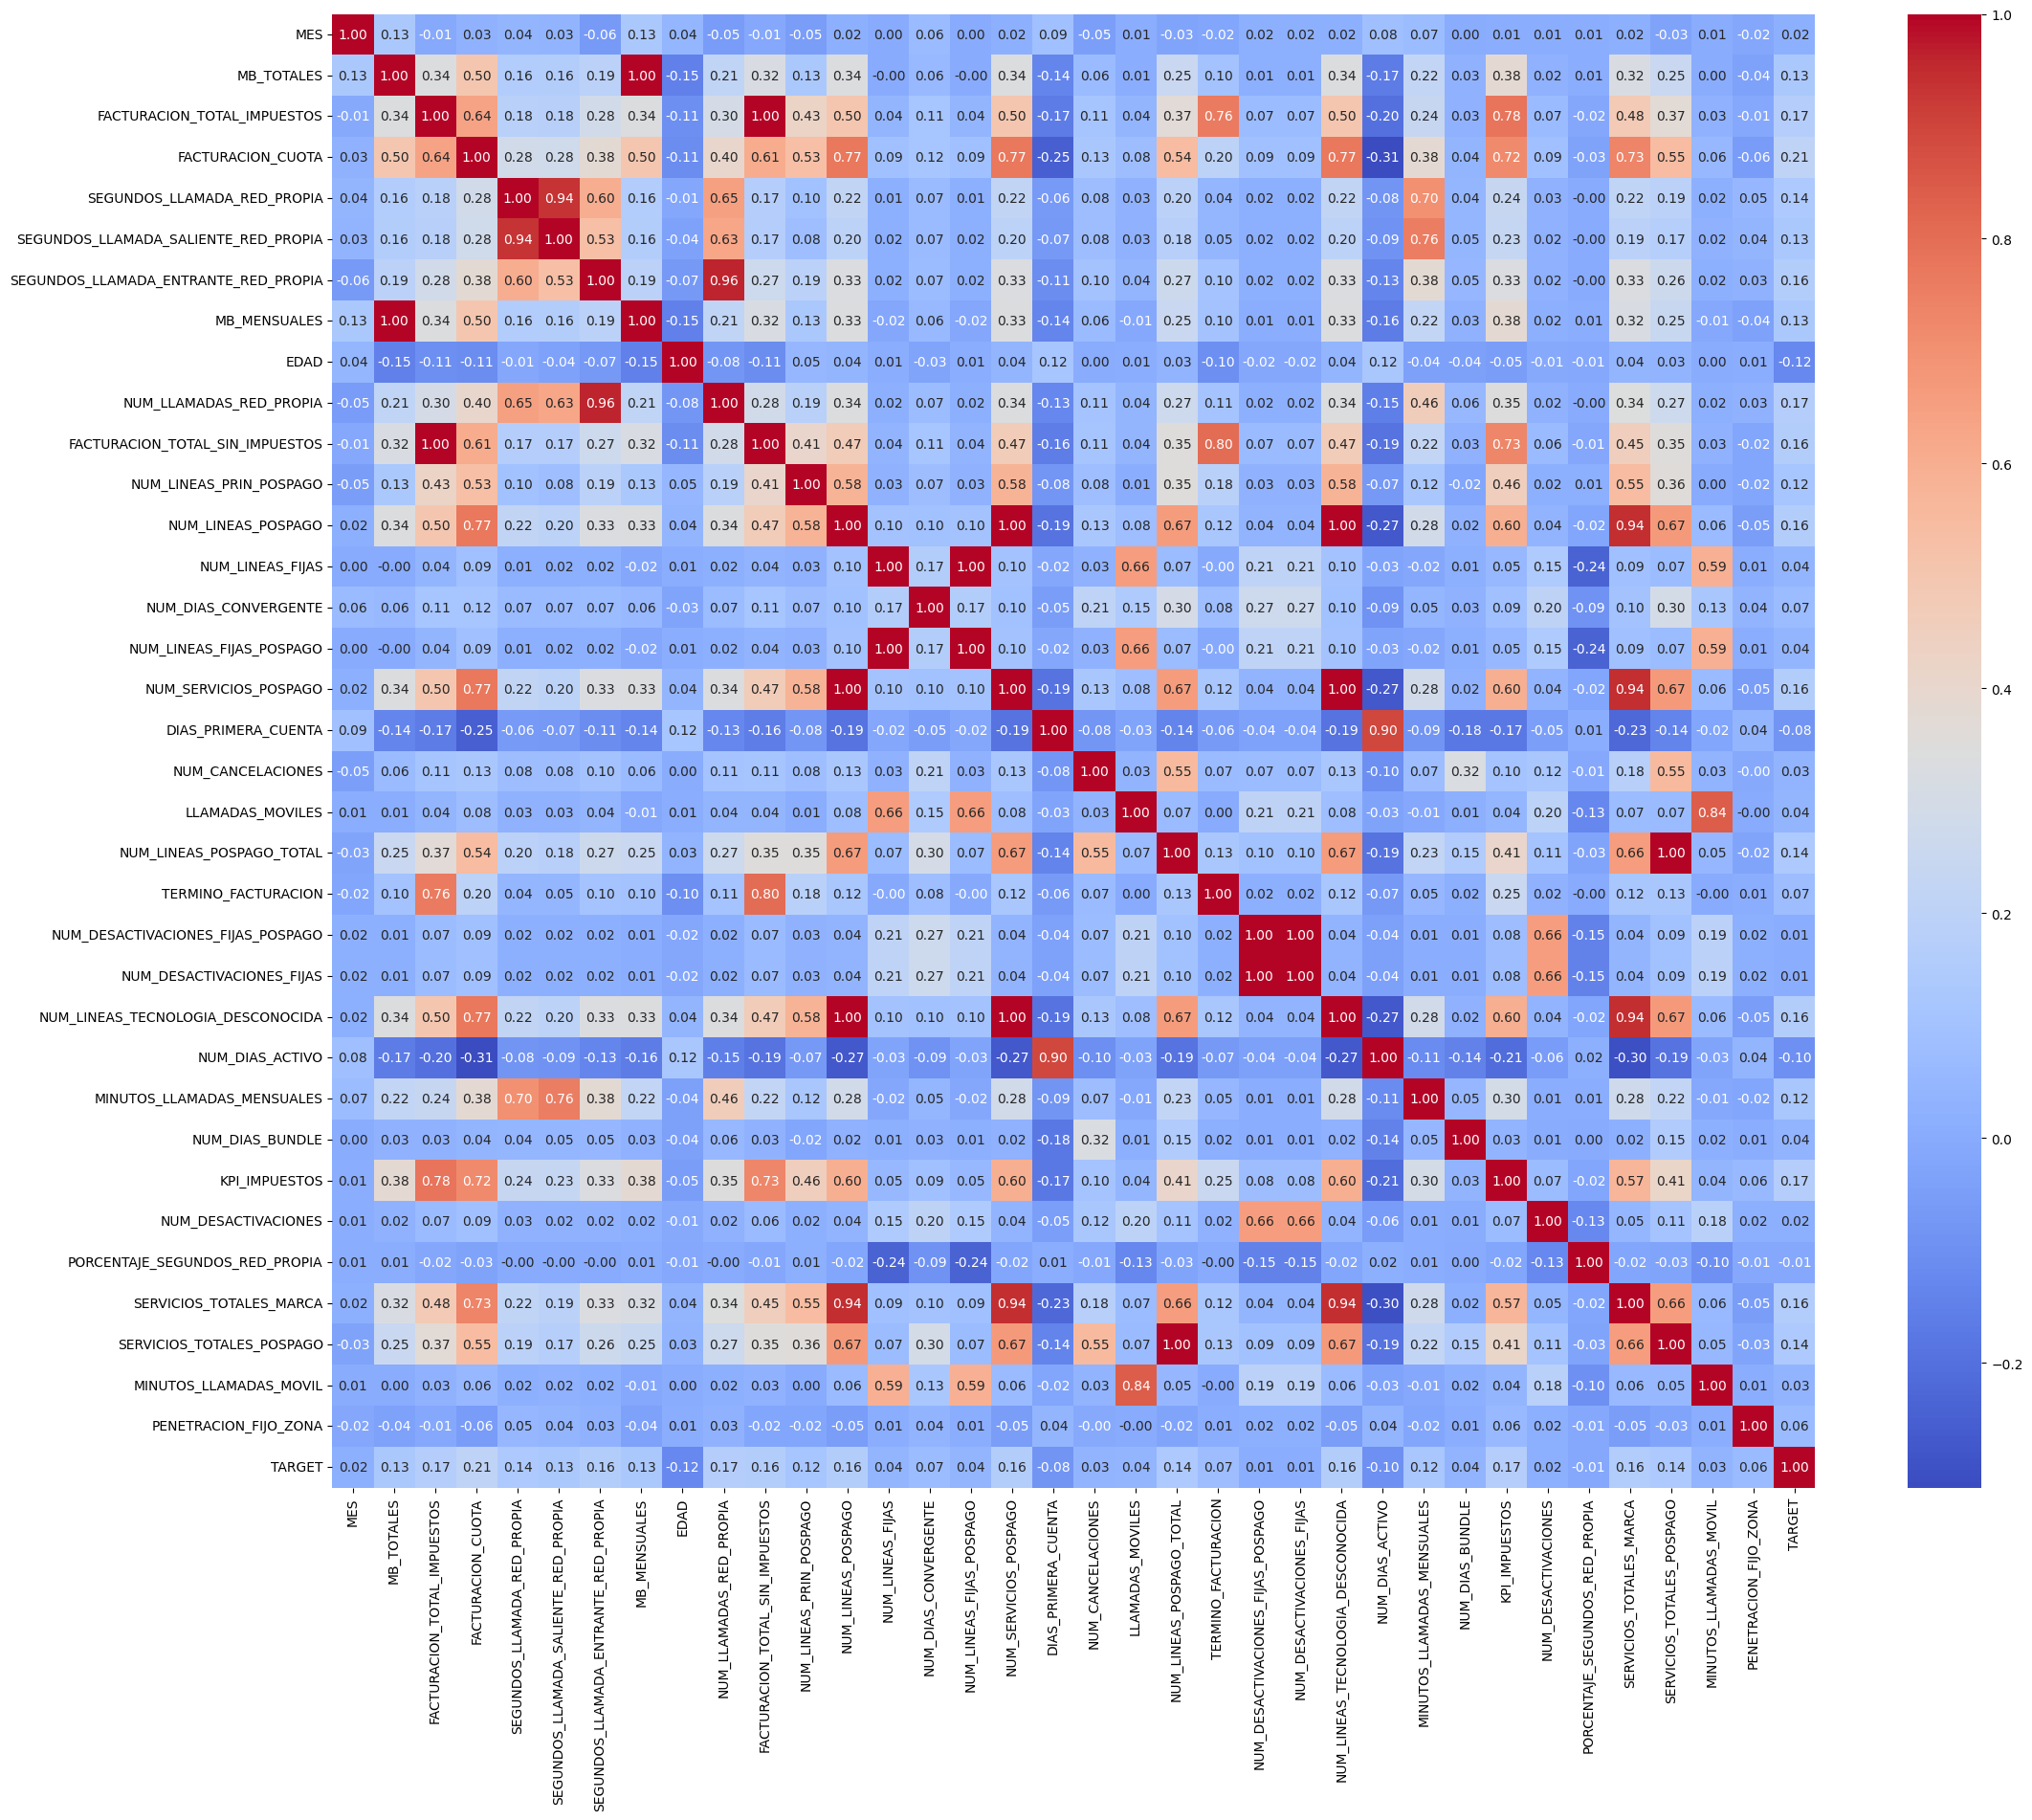

In [ ]:
# Matriz de correlación
corr_matrix = df_imputed.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
corr_threshold = 0.85

# Calcular la matriz de correlación
corr_matrix = df_imputed.corr()

# Creamos una lista vacía para almacenar las columnas a eliminar
columns_to_drop = []

# Recorremos la matriz de correlación
for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    # Si la correlación entre dos columnas supera el umbral y no son la misma columna, agregamos la columna con el índice mayor a la lista de columnas a eliminar
    if corr_matrix.iloc[i, j] > corr_threshold and i != j:
      columns_to_drop.append(corr_matrix.columns[j])

# Eliminamos las columnas seleccionadas del DataFrame
df_reduced = df_imputed.drop(columns=columns_to_drop)

# Imprimimos las primeras filas del DataFrame reducido
df_reduced.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901.0    232.121597                    10.186000           0.000000   
1  201911.0  18280.292969                    32.005001          26.450001   
2  201906.0   2141.692810                    37.442001          31.400000   
3  202006.0   3181.986496                    20.001000          16.530000   
4  202001.0  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  EDAD  \
0                       4523.0                                  28.0  39.0   
1                      13288.0                                  49.0  25.0   
2                         13.0                                   0.0  47.0   
3                          0.0                                   0.0  43.0   
4                      72783.0                                 151.0  40.0   

   NUM_LINEAS_PRIN_POSPAGO  NUM_LINEAS_POSPAGO  NUM_LINEAS_FIJAS  ...  \
0                      1.0                 1.0               0.0  ...   
1                      1.0                 1.0               0.0  ...   
2                      2.0                 2.0               0.0  ...   
3                      1.0                 2.0               0.0  ...   
4                      1.0                 1.0               0.0  ...   

   TERMINO_FACTURACION  NUM_DESACTIVACIONES_FIJAS_POSPAGO  \
0                  0.0                                0.0   
1                  0.0                                0.0   
2                  4.0                                0.0   
3                  0.0                                0.0   
4                  5.0                                0.0   

   MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  KPI_IMPUESTOS  \
0                   21.683399              0.0       1.767800   
1                  166.050007            435.0       5.555000   
2                  108.850102              0.0       2.042002   
3                   65.799899              0.0       3.471001   
4                  519.683305              1.0       5.555000   

   NUM_DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0                  0.0                           100.0   
1                  0.0                           100.0   
2                  0.0                           100.0   
3                  0.0                           100.0   
4                  0.0                           100.0   

   MINUTOS_LLAMADAS_MOVIL  PENETRACION_FIJO_ZONA  TARGET  
0                     0.0               0.264612     0.0  
1                     0.0               0.380171     0.0  
2                     0.0               0.156041     0.0  
3                     0.0               0.228810     1.0  
4                     0.0               0.210286     1.0  

[5 rows x 25 columns]

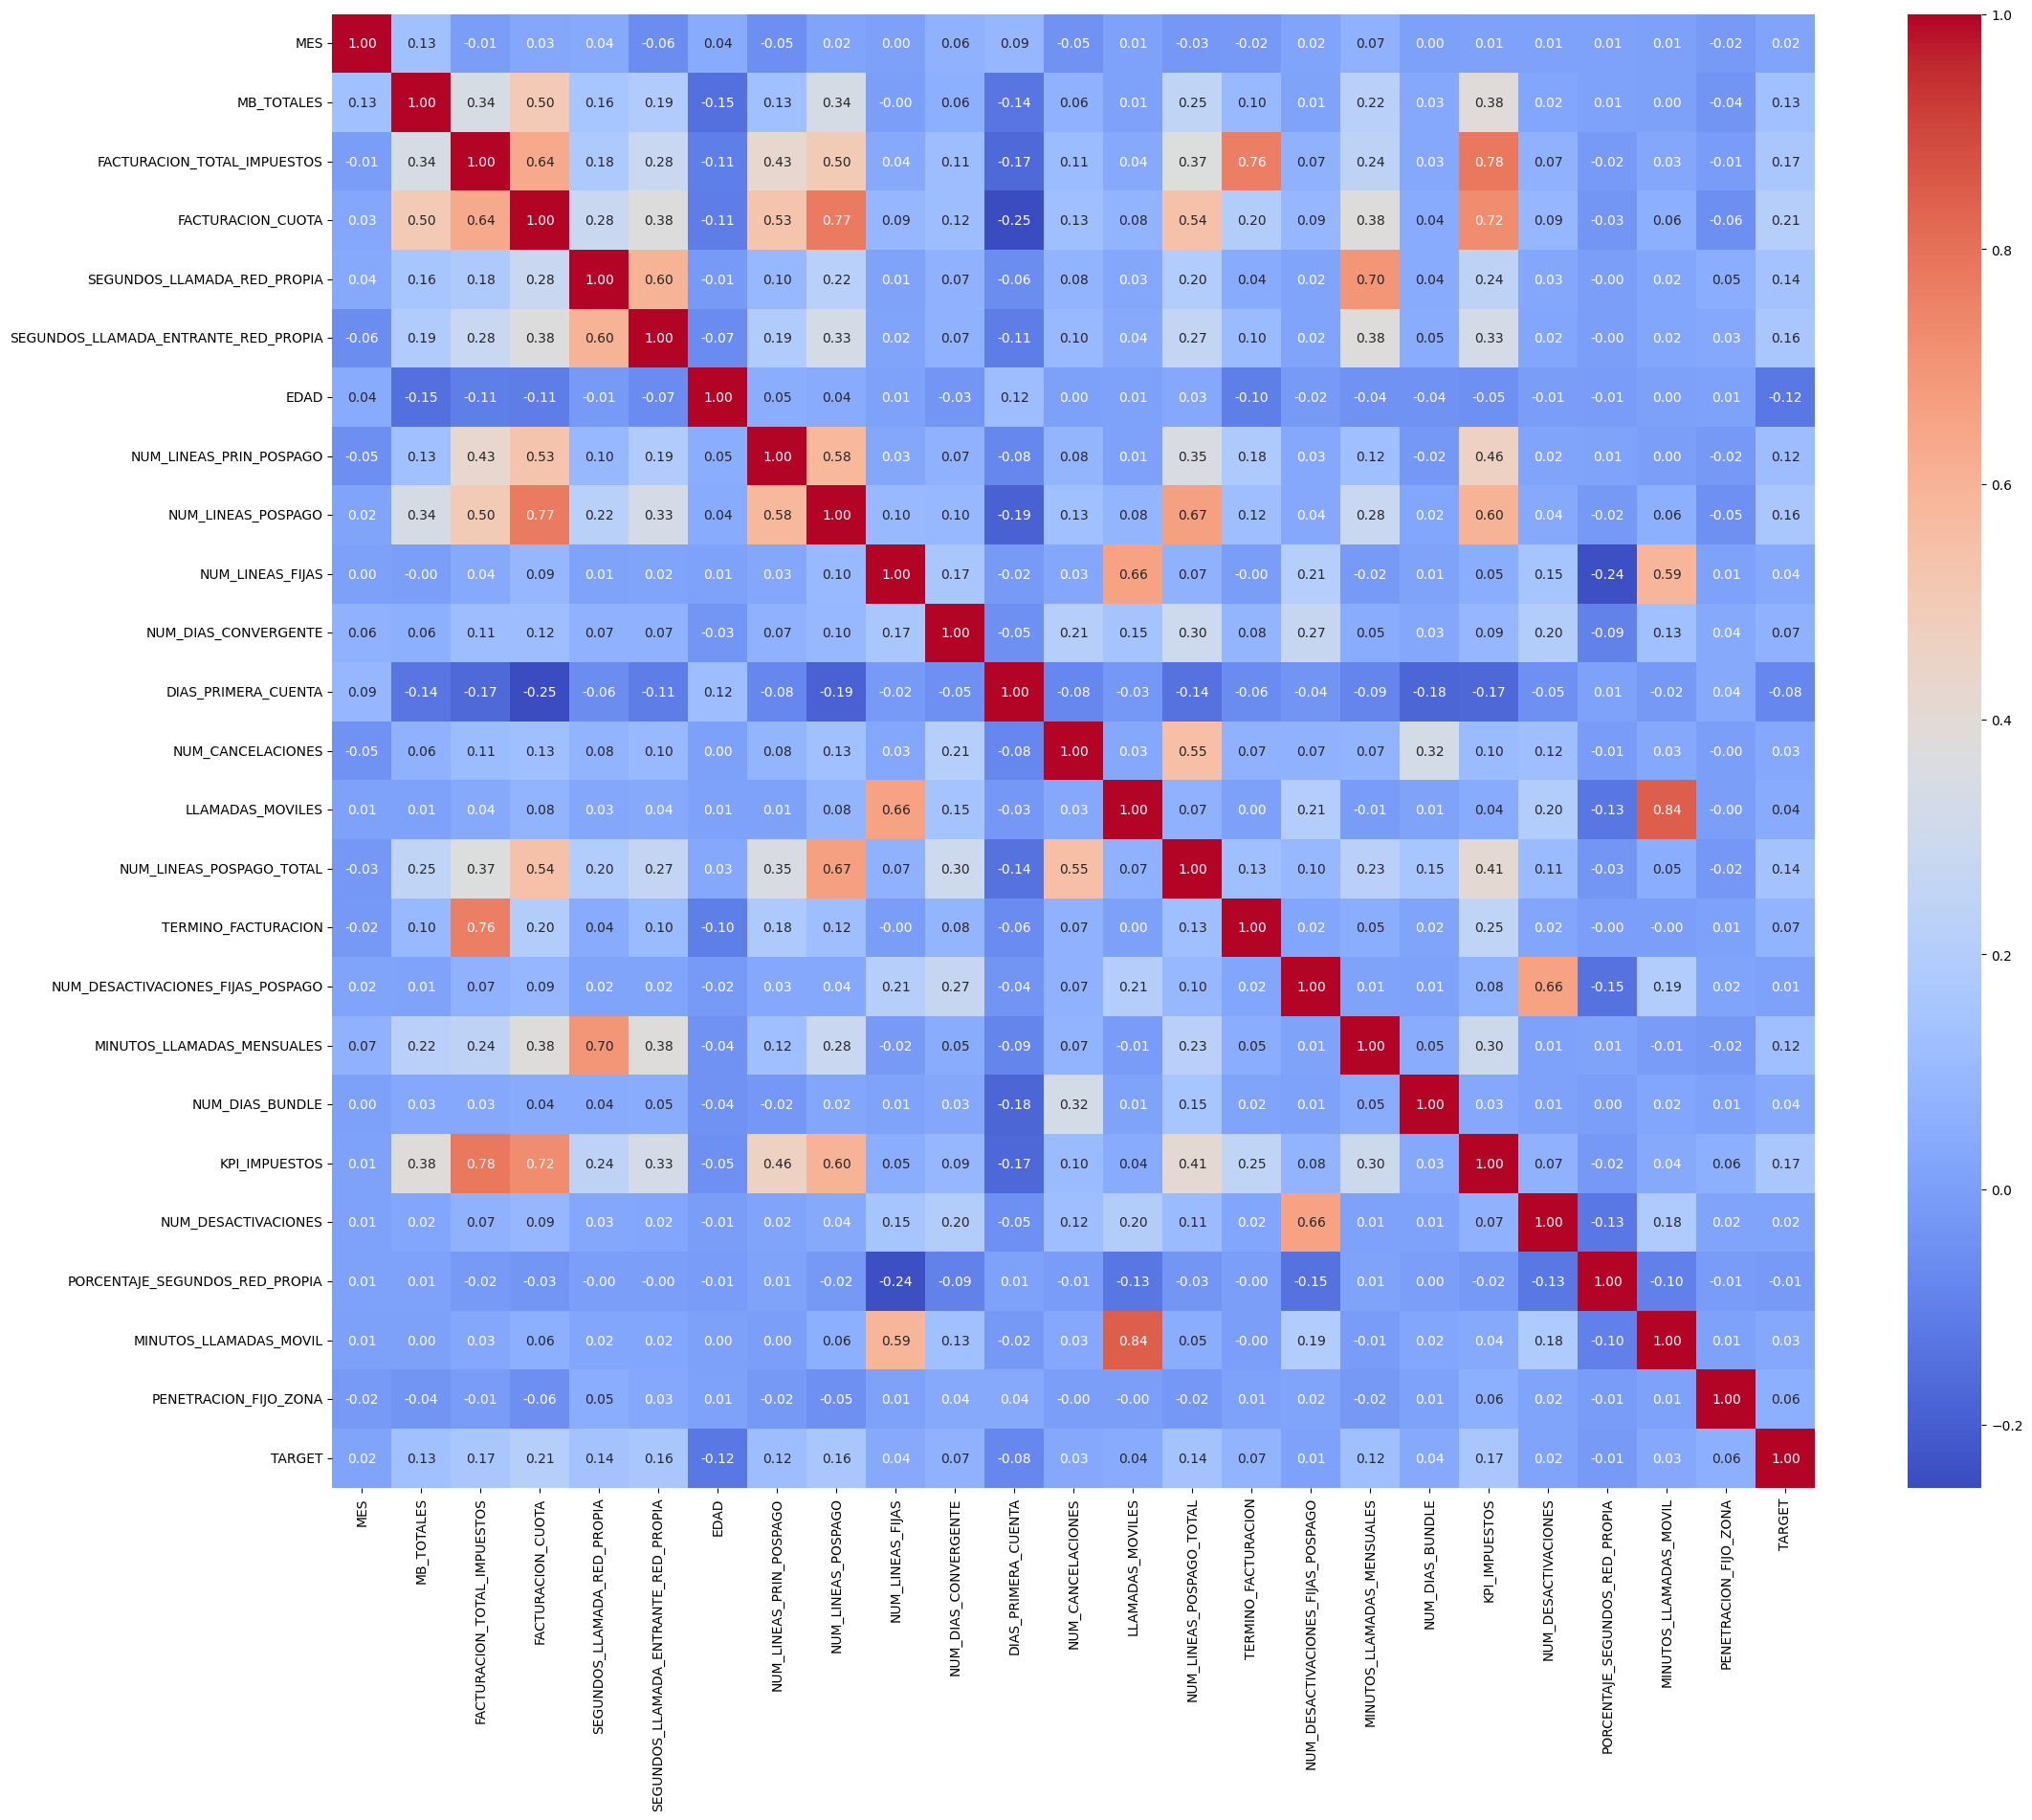

In [ ]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
df_reduced.shape, df_imputed.shape

((20000, 25), (20000, 36))

In [ ]:
# see the number of unique values in each column
for column in df_reduced.columns:
    print(f'{column}: {df_reduced[column].nunique()}')

MES: 23
MB_TOTALES: 19530
FACTURACION_TOTAL_IMPUESTOS: 11296
FACTURACION_CUOTA: 1405
SEGUNDOS_LLAMADA_RED_PROPIA: 13939
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA: 679
EDAD: 107
NUM_LINEAS_PRIN_POSPAGO: 6
NUM_LINEAS_POSPAGO: 8
NUM_LINEAS_FIJAS: 3
NUM_DIAS_CONVERGENTE: 484
DIAS_PRIMERA_CUENTA: 3628
NUM_CANCELACIONES: 16
LLAMADAS_MOVILES: 122
NUM_LINEAS_POSPAGO_TOTAL: 16
TERMINO_FACTURACION: 590
NUM_DESACTIVACIONES_FIJAS_POSPAGO: 2
MINUTOS_LLAMADAS_MENSUALES: 19537
NUM_DIAS_BUNDLE: 1661
KPI_IMPUESTOS: 8843
NUM_DESACTIVACIONES: 5
PORCENTAJE_SEGUNDOS_RED_PROPIA: 294
MINUTOS_LLAMADAS_MOVIL: 125
PENETRACION_FIJO_ZONA: 1375
TARGET: 2


In [ ]:
# See the unique values in each column that has less than 10 unique values
for column in df_reduced.columns:
    if df_reduced[column].nunique() < 10:
        print(f'{column}: {df_reduced[column].unique()}')

NUM_LINEAS_PRIN_POSPAGO: [1. 2. 4. 3. 0. 5.]
NUM_LINEAS_POSPAGO: [1. 2. 3. 4. 5. 6. 7. 8.]
NUM_LINEAS_FIJAS: [0. 1. 2.]
NUM_DESACTIVACIONES_FIJAS_POSPAGO: [0. 1.]
NUM_DESACTIVACIONES: [0. 1. 2. 3. 4.]
TARGET: [0. 1.]


In [ ]:
# Except for the target column, drop the columns which values being 0 are more than 90% of the total
columns_to_drop = []
for column in df_reduced.columns:
    if column != 'target':
        if df_reduced[column].value_counts(normalize=True).max() > 0.85:
            columns_to_drop.append(column)
df_reduced = df_reduced.drop(columns=columns_to_drop)

In [ ]:
df_reduced.shape

(20000, 17)

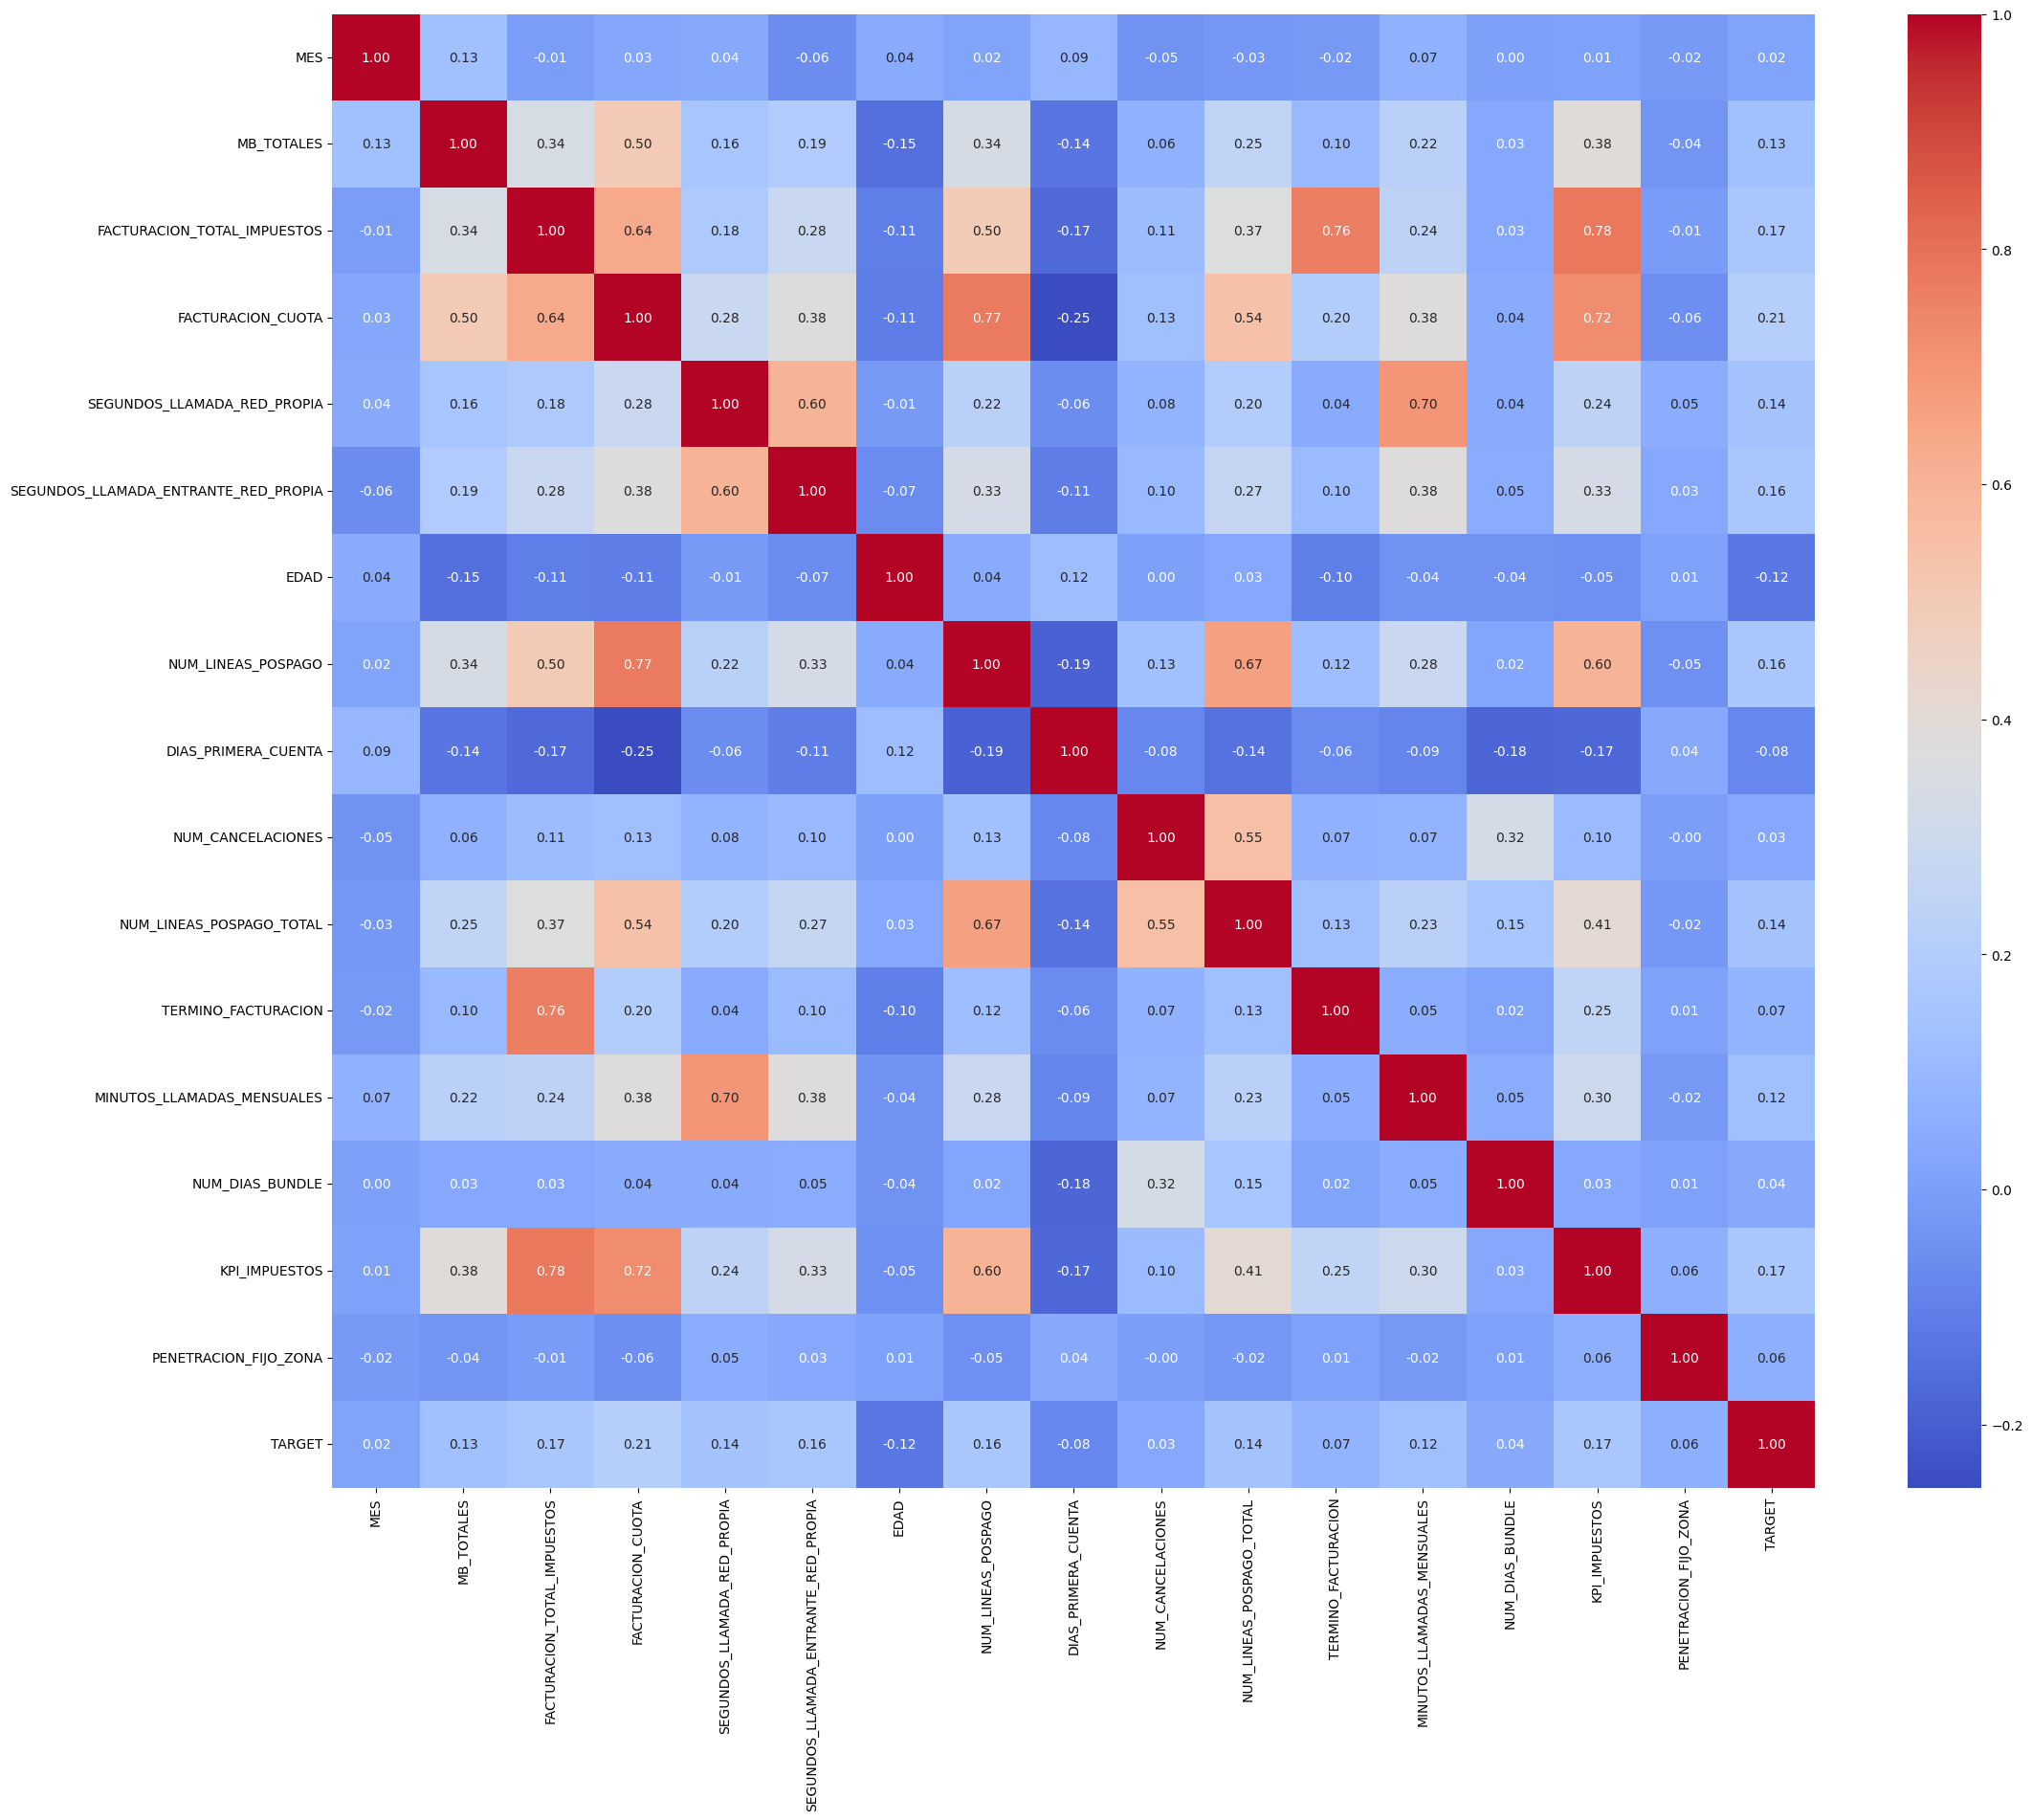

In [ ]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

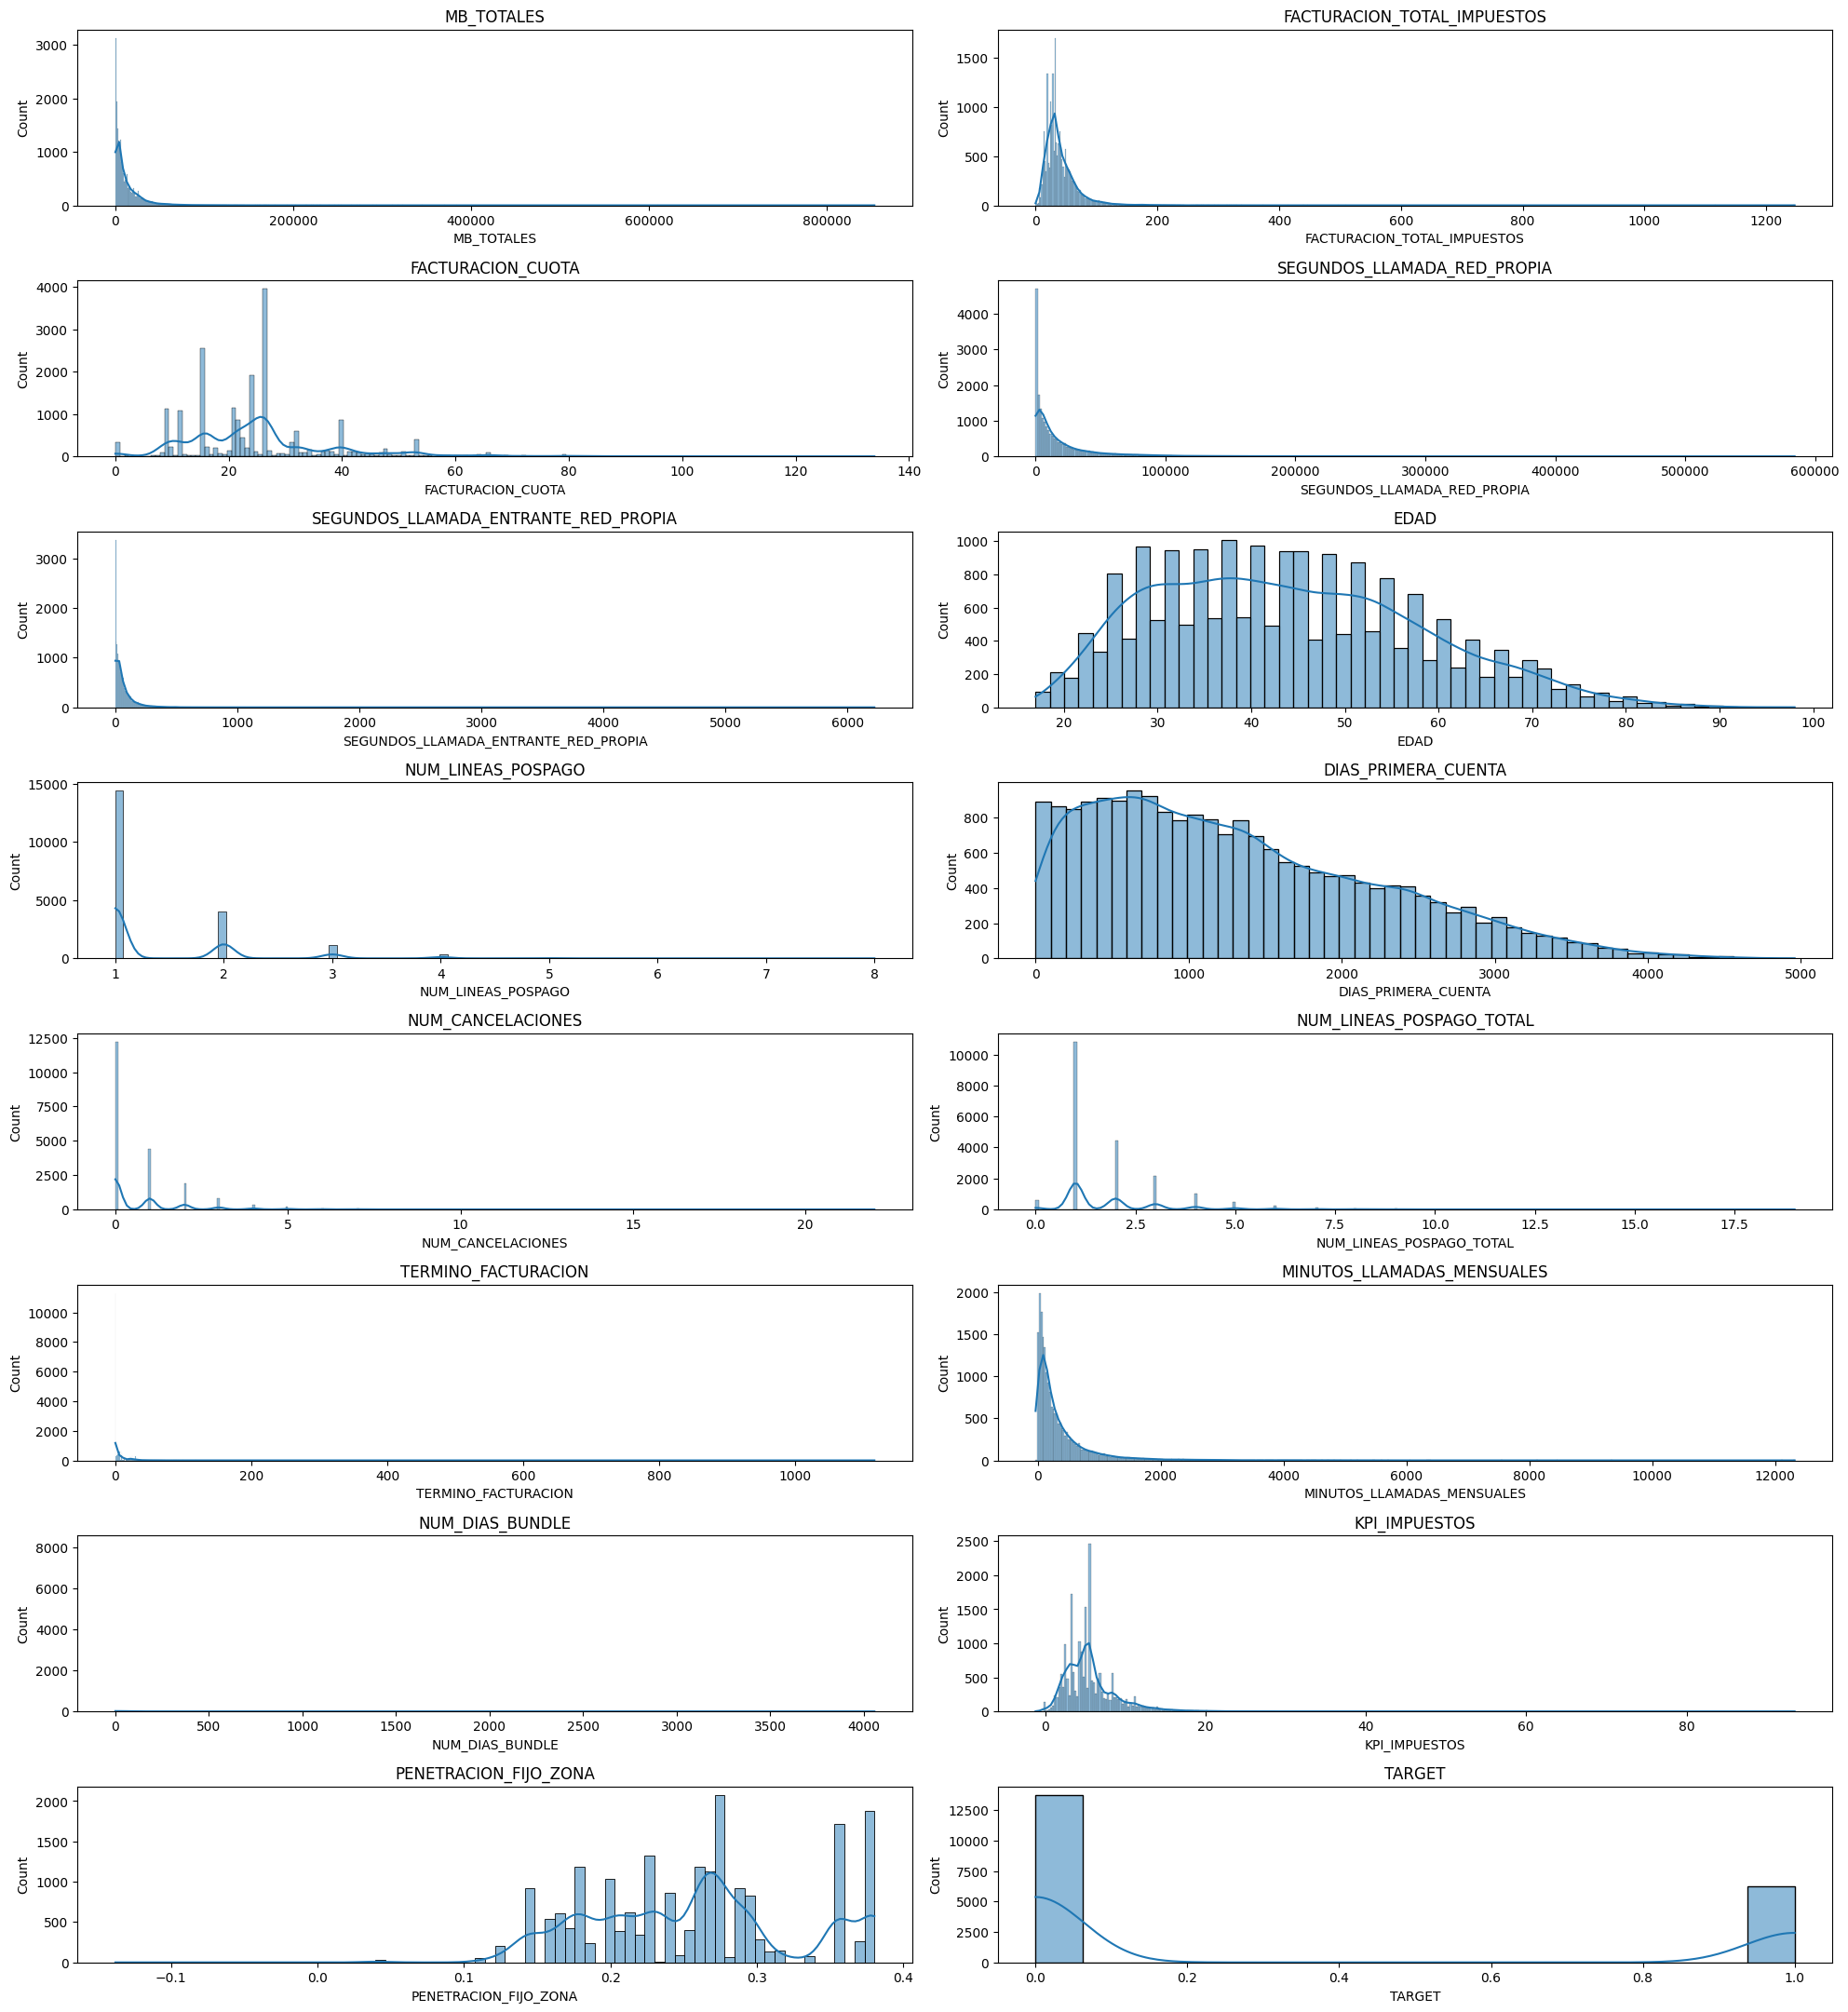

In [ ]:
# Histograma de algunas variables
variables = df_reduced.columns[1:]
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_reduced[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

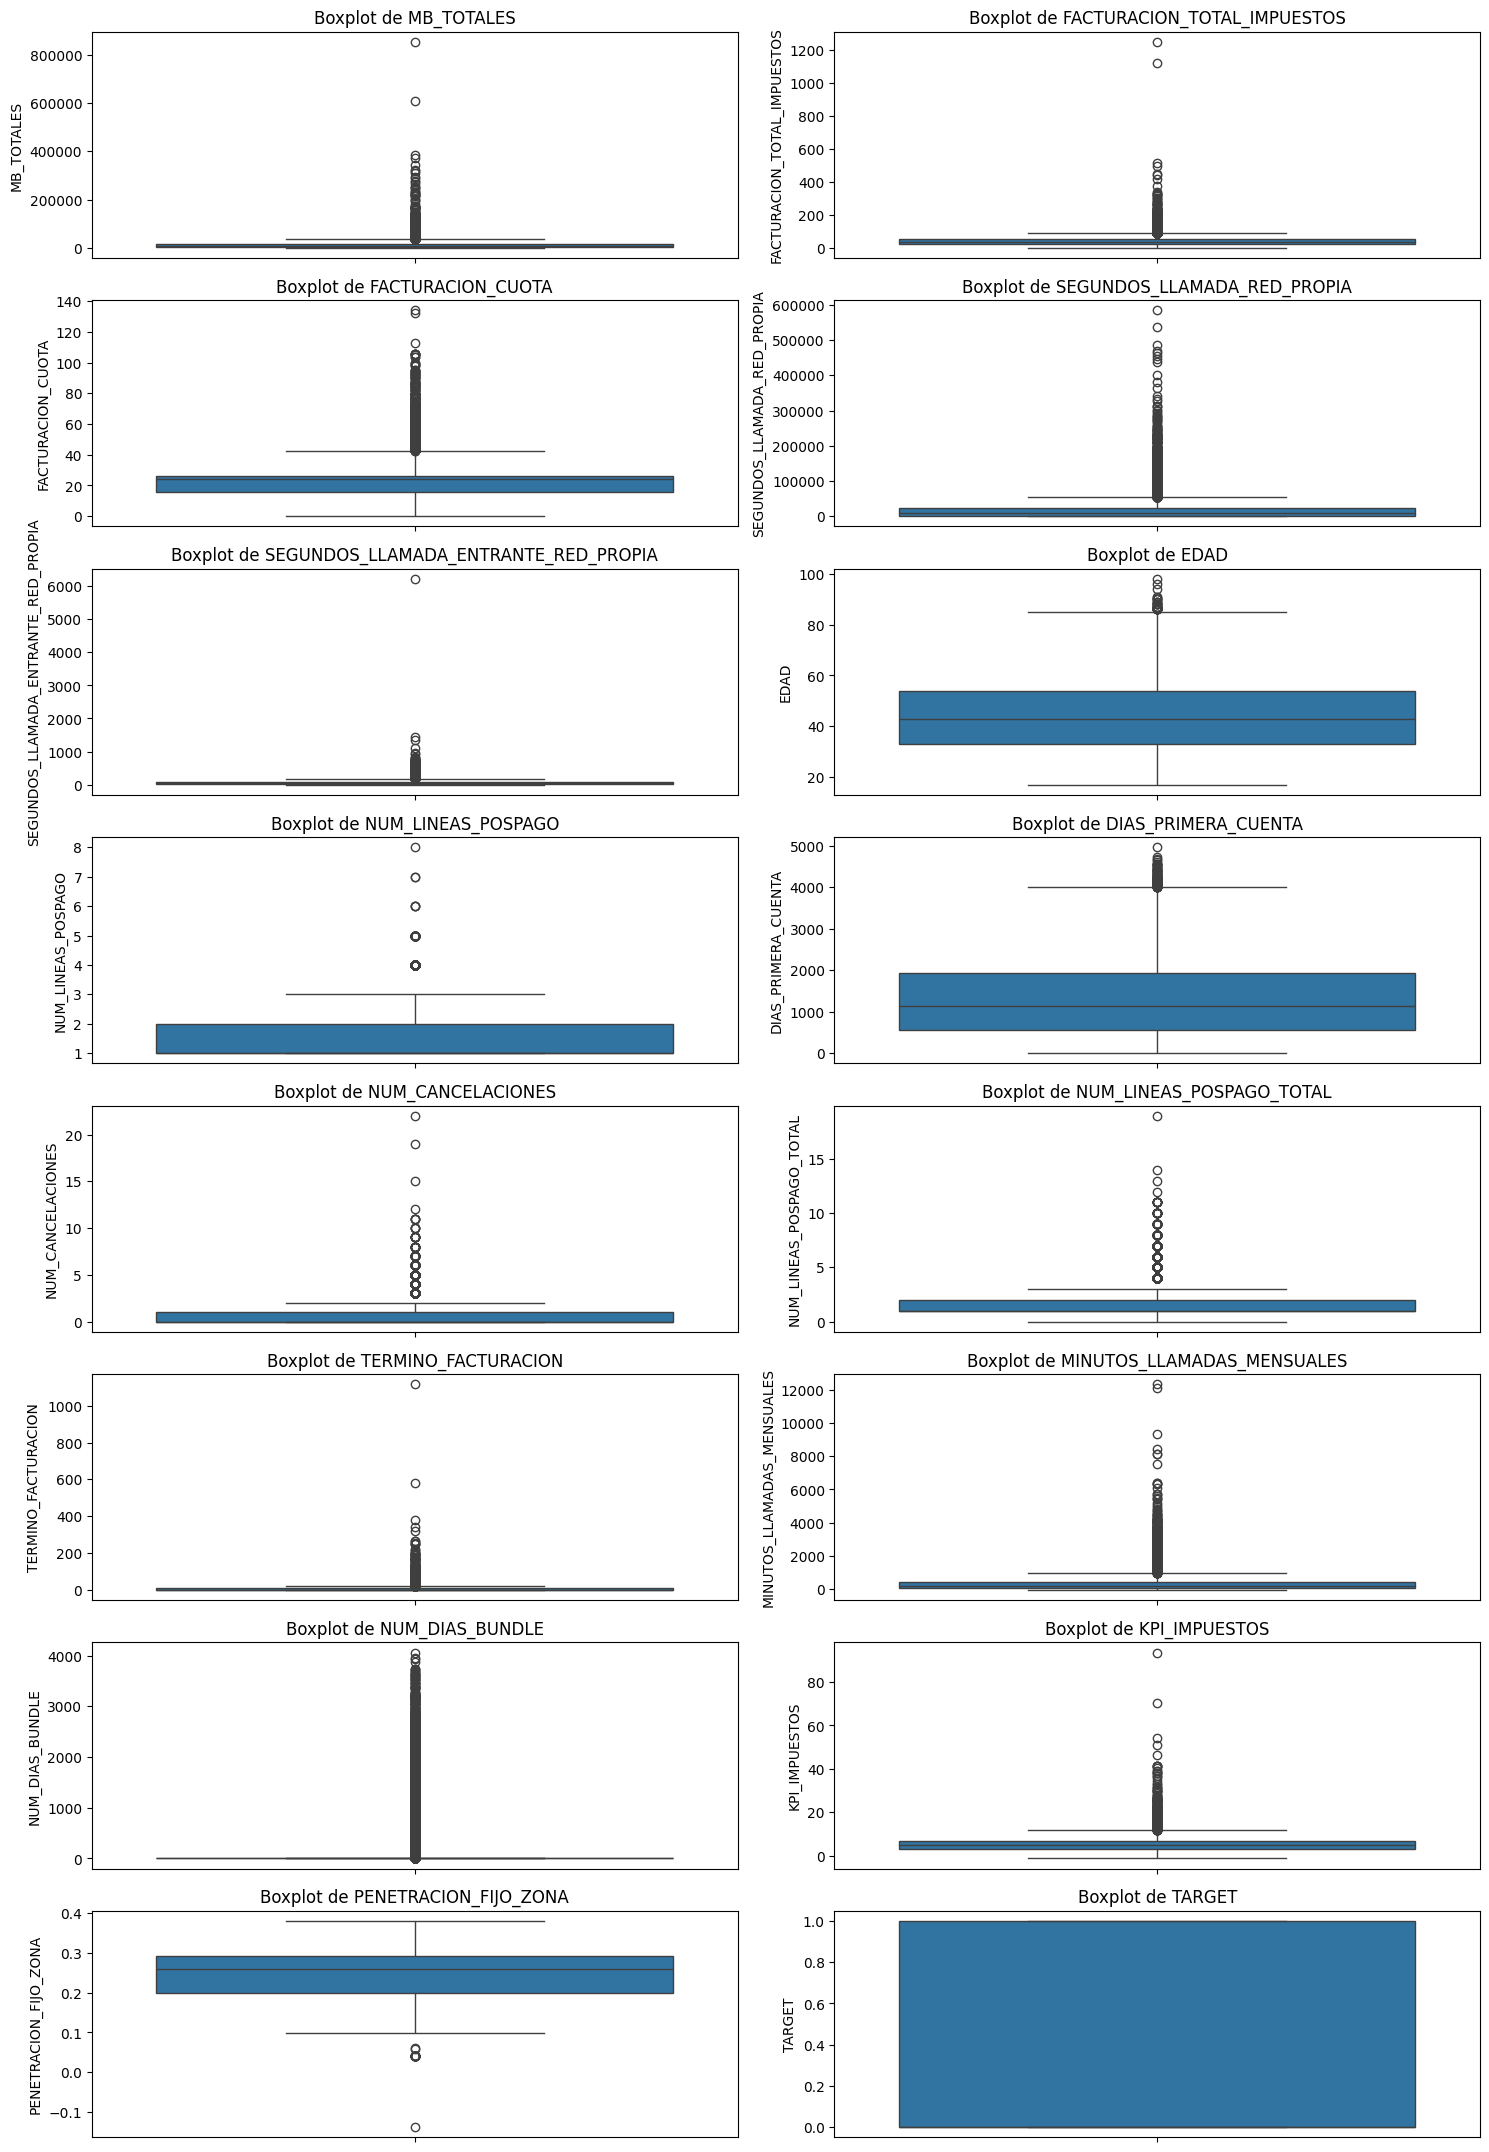

In [ ]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_imputed[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Convertir la columna MES al formato de fecha
df_reduced['MES'] = pd.to_datetime(df_reduced['MES'], format='%Y%m')

# Crear nuevas columnas para año y mes
df_reduced['MES_AÑO'] = df_reduced['MES'].dt.year
df_reduced['MES_MES'] = df_reduced['MES'].dt.month

# Eliminar la columna original MES si no se va a usar directamente
df_reduced = df_reduced.drop('MES', axis=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31880\1746465516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_31880\1746465516.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')


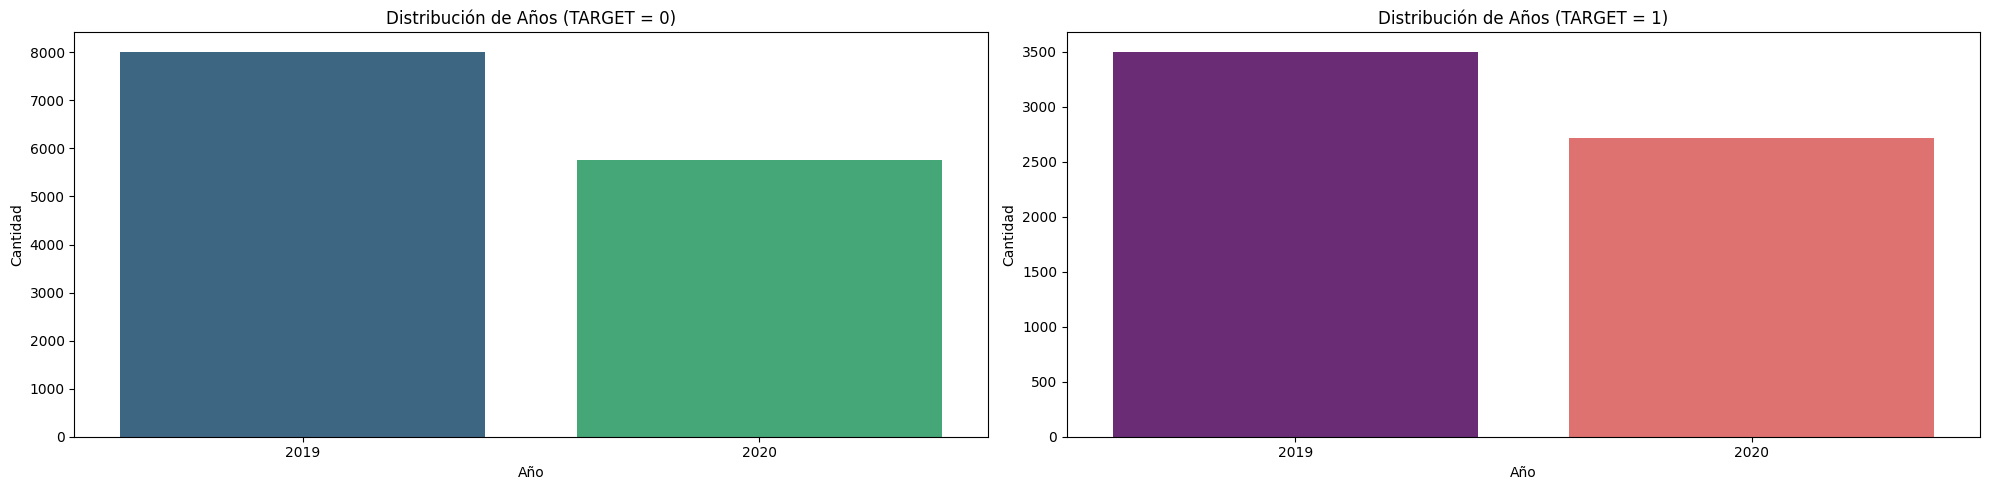

C:\Users\Usuario\AppData\Local\Temp\ipykernel_31880\1746465516.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_31880\1746465516.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')


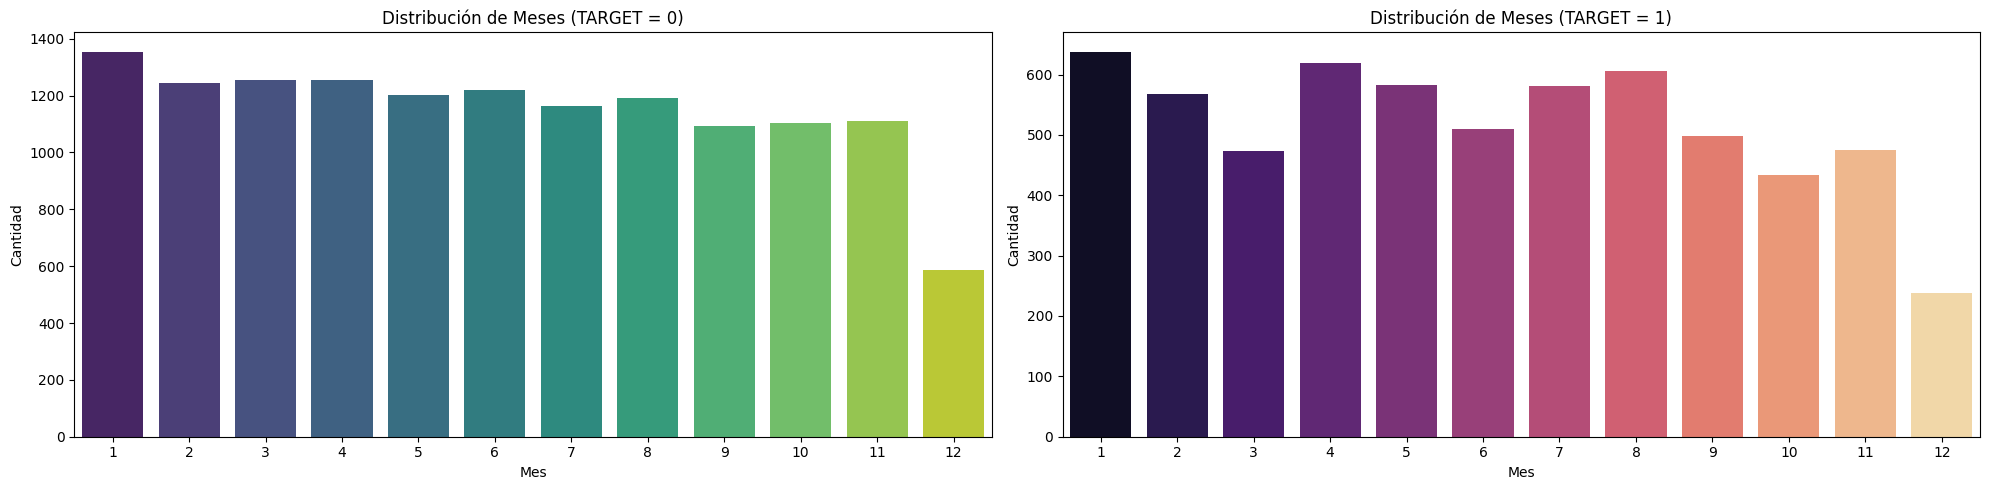

In [ ]:
# Crear las figuras y los subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Distribución de años con TARGET 0
sns.countplot(ax=axes[0], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Años (TARGET = 0)')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad')

# Distribución de años con TARGET 1
sns.countplot(ax=axes[1], x='MES_AÑO', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Años (TARGET = 1)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

# Crear las figuras y los subplots para la distribución de meses
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Distribución de meses con TARGET 0
sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Meses (TARGET = 0)')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad')

# Distribución de meses con TARGET 1
sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Meses (TARGET = 1)')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Asumiendo que 'X' es tu DataFrame de características
# Inicializar el detector LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Puedes ajustar los parámetros según tus necesidades

# Ajustar el modelo y predecir los outliers
yhat = lof.fit_predict(df_reduced)

# Seleccionar todos los puntos que no son outliers
mask = yhat != -1
df_cleaned = df_reduced[mask]

# Mostrar la cantidad de outliers detectados y eliminados
print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")
print(f"Datos restantes después de la limpieza: {df_cleaned.shape[0]}")

# X_cleaned ahora contiene el DataFrame sin los outliers

Outliers detectados y eliminados: 2000
Datos restantes después de la limpieza: 18000


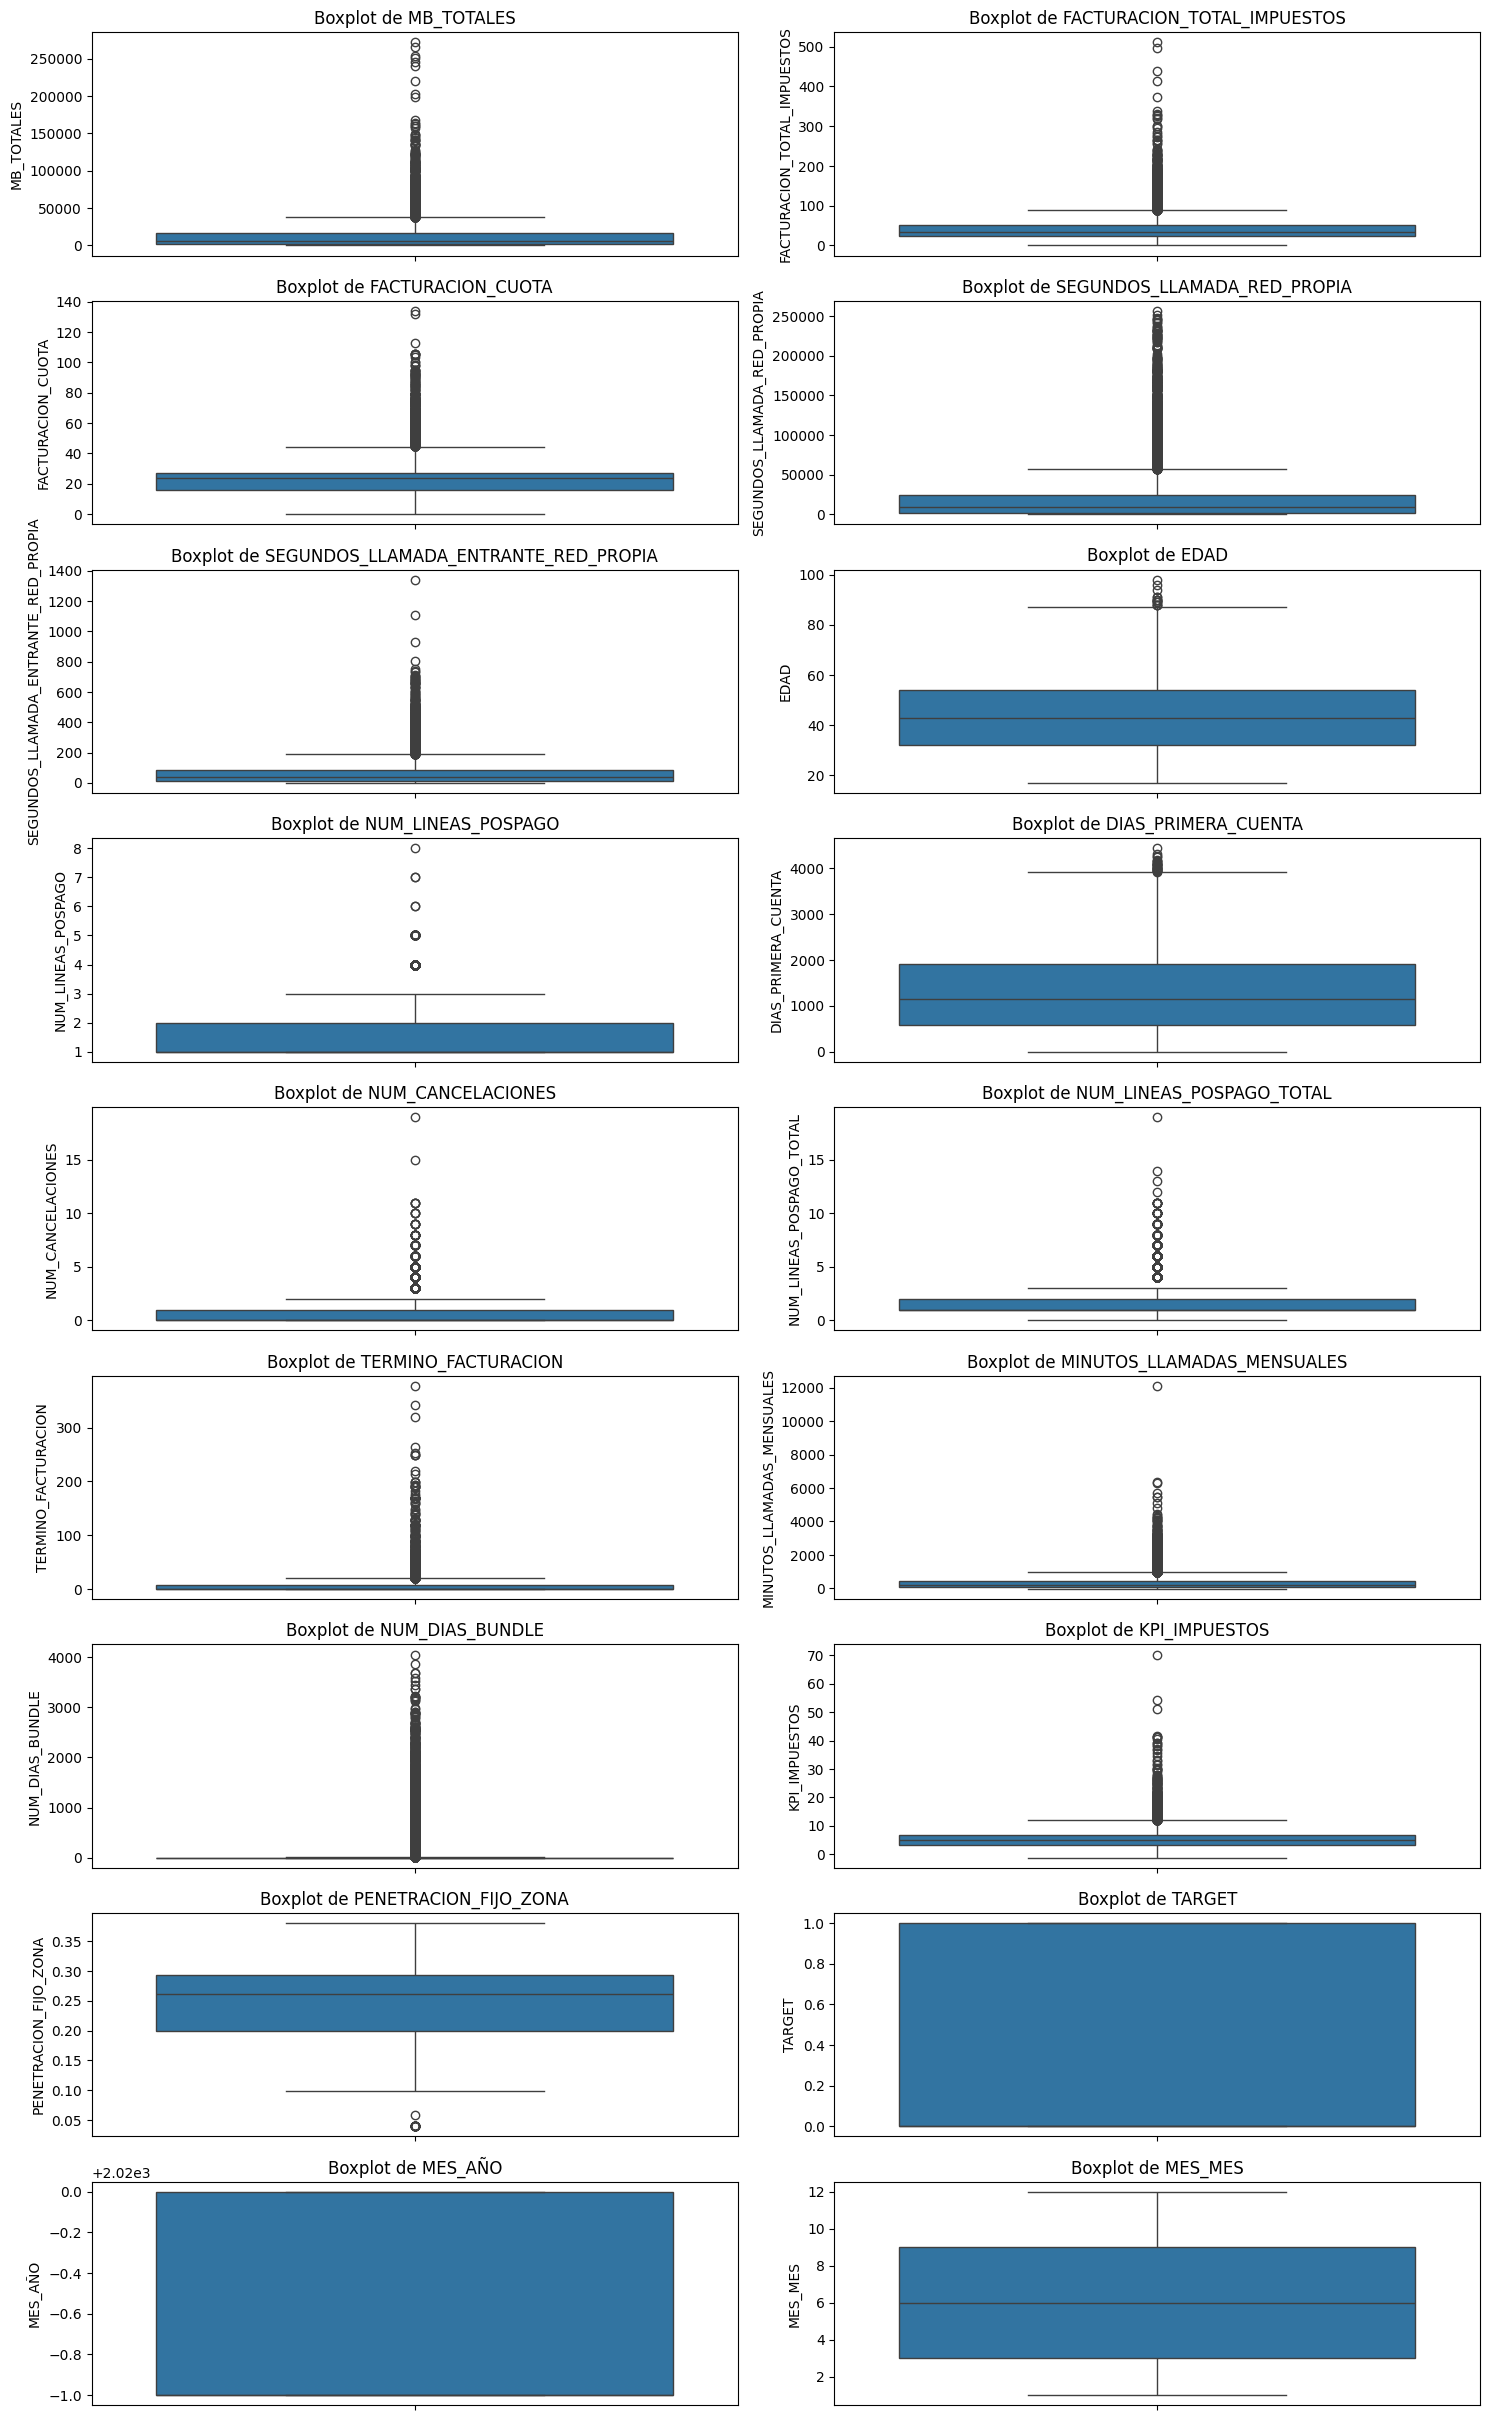

In [ ]:
# Boxplot de algunas variables
plt.figure(figsize=(15, 35))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

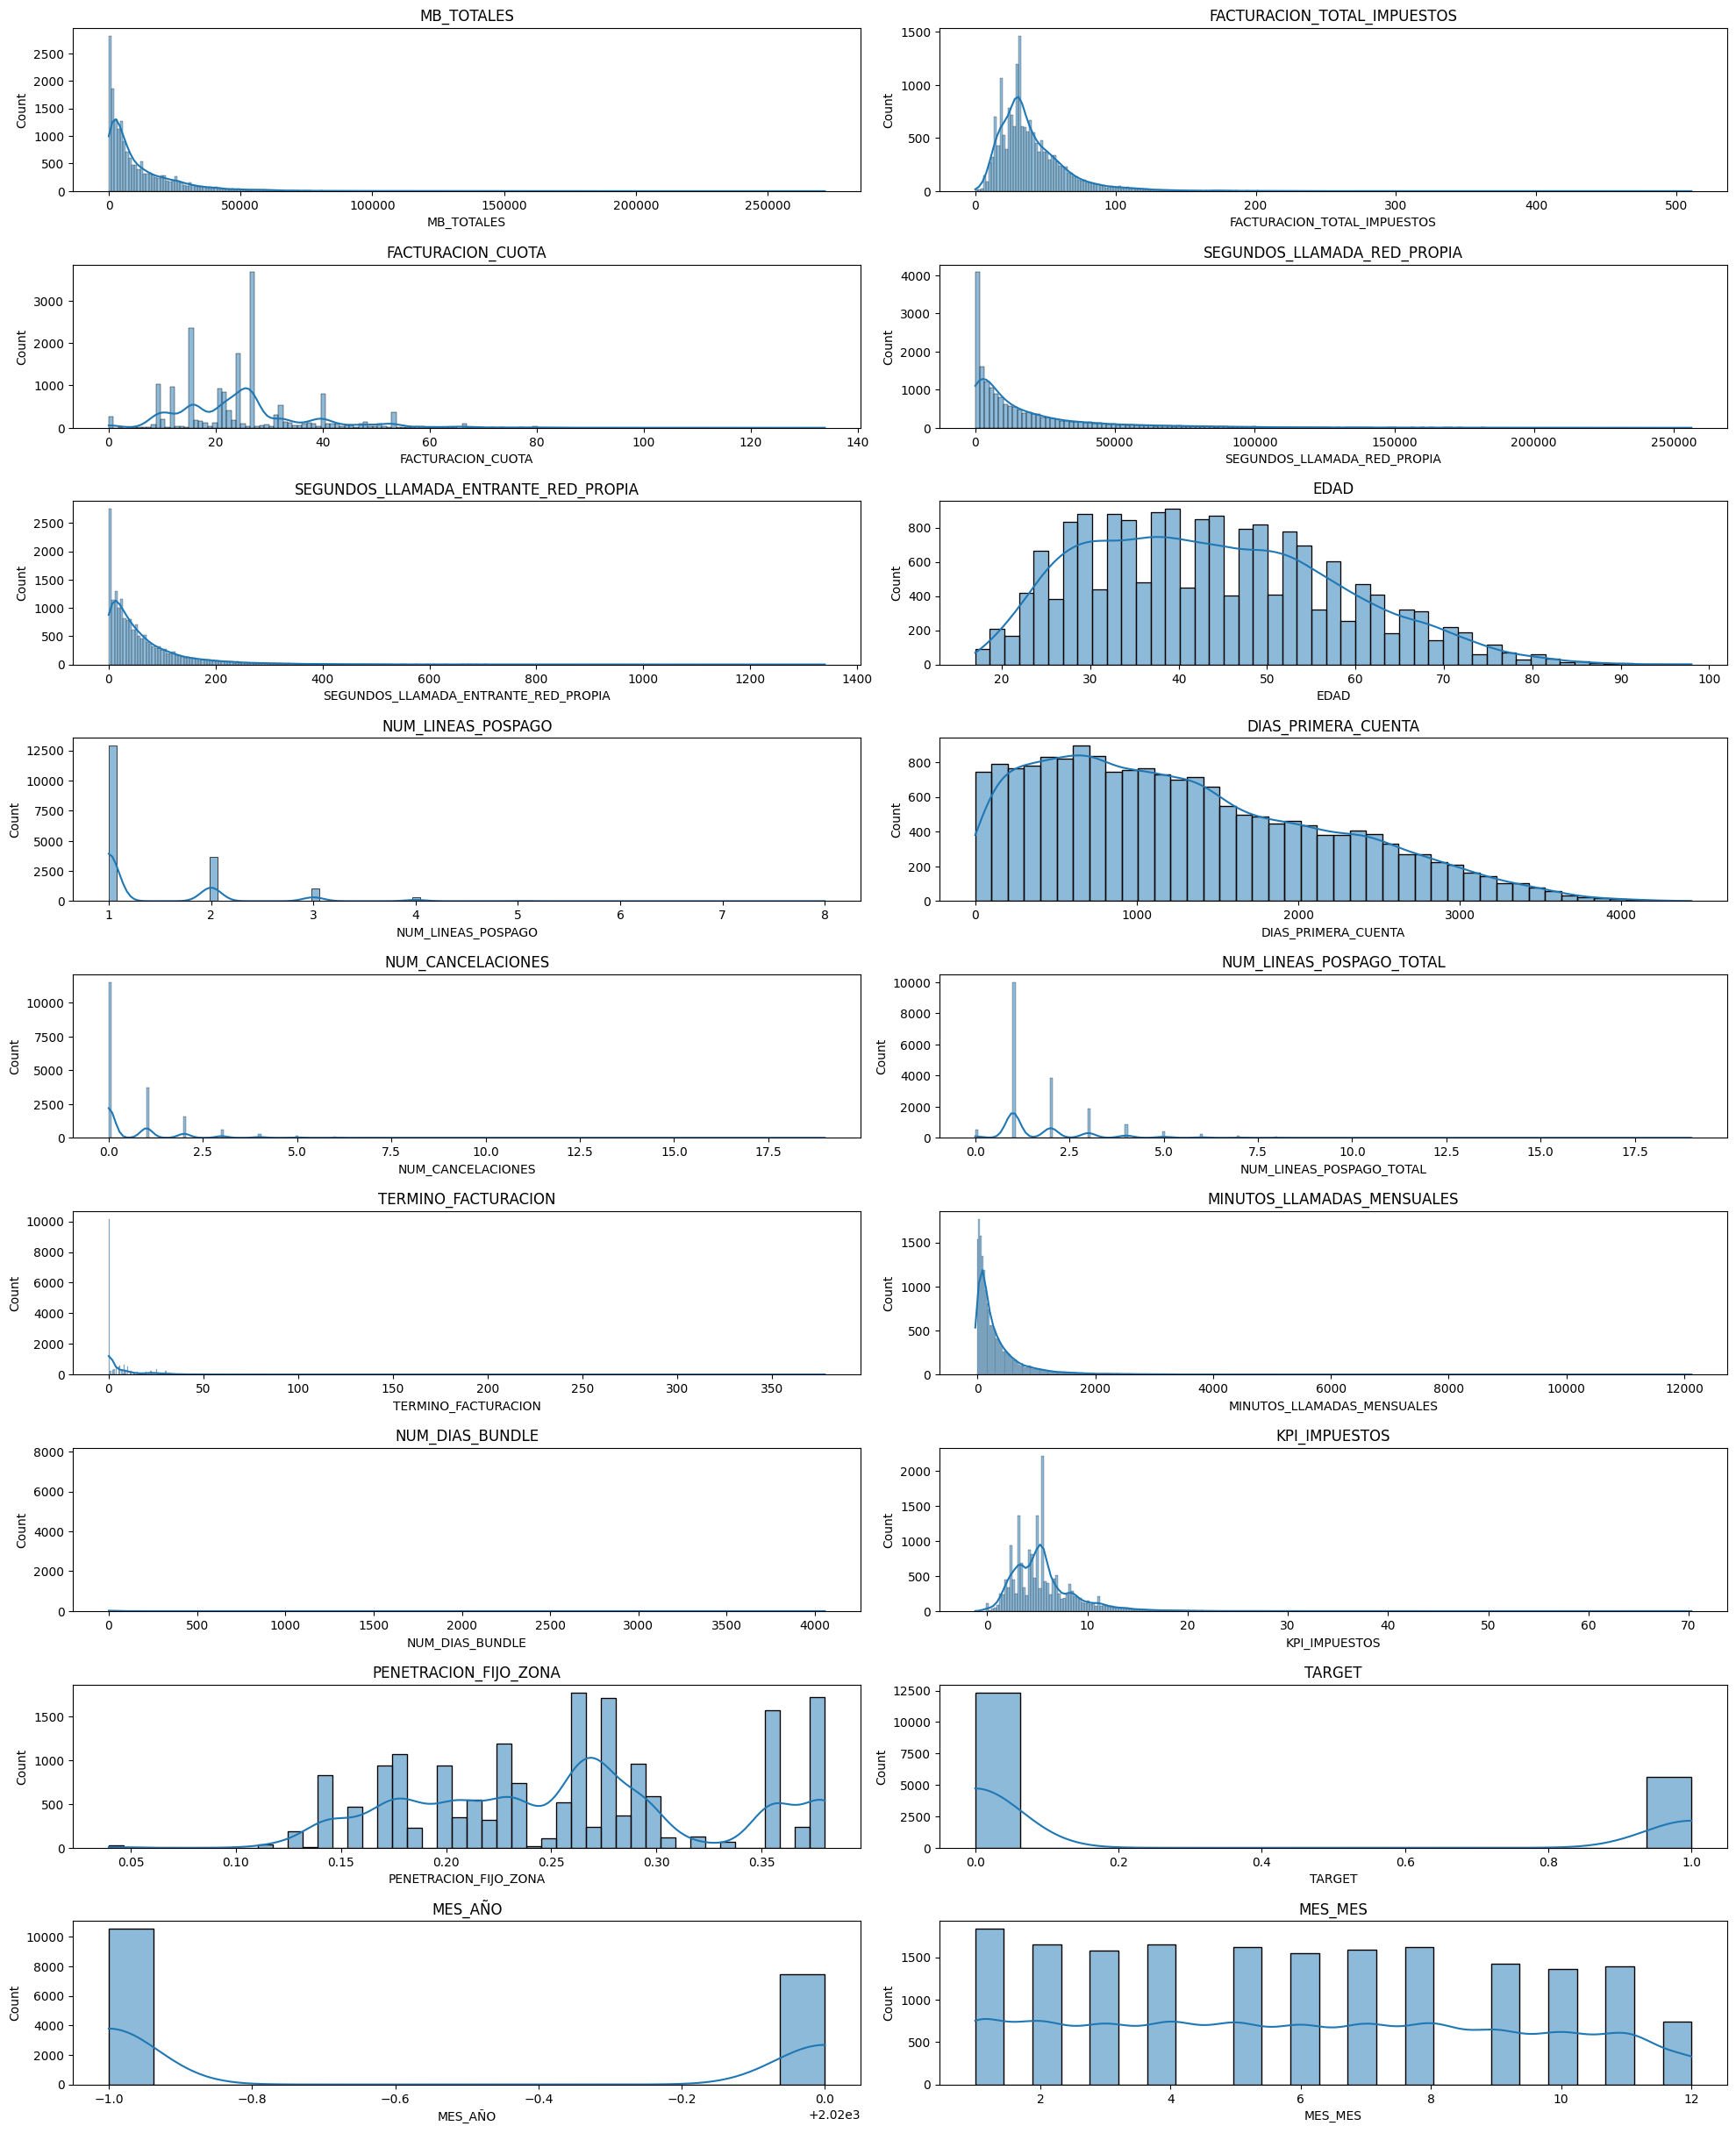

In [ ]:
# Histograma de algunas variables
variables = df_cleaned.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_cleaned[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

In [ ]:
df_cleaned.to_csv('./caso_final_small_20k_con_mes_cleaned.csv', index=False)

In [21]:
%pip install statsmodels
%pip install plotly
%pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.22.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.18.1-cp310-none-win_amd64.whl.metadata (4.2 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.19.1-py3-none-any.whl (23 kB)
Using cached jsonschema-4.22.0-py3-none-any.whl (88 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Using cached rpds_p

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, roc_auc_score, make_scorer, roc_curve, recall_score, precision_score, matthews_corrcoef
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import torch
import logging
from statsmodels.stats.outliers_influence import variance_inflation_factor

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_cleaned = pd.read_csv('./caso_final_small_20k_con_mes_cleaned.csv')

In [3]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(len(df_cleaned.columns))]
vif_data

feature        VIF
0                             MB_TOTALES   2.374631
1            FACTURACION_TOTAL_IMPUESTOS  85.119630
2                      FACTURACION_CUOTA  23.153803
3            SEGUNDOS_LLAMADA_RED_PROPIA   5.227124
4   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   3.731727
5                                   EDAD  11.787247
6                     NUM_LINEAS_POSPAGO  18.287587
7                    DIAS_PRIMERA_CUENTA   3.475753
8                      NUM_CANCELACIONES   2.393918
9               NUM_LINEAS_POSPAGO_TOTAL   8.672233
10                   TERMINO_FACTURACION  11.807178
11            MINUTOS_LLAMADAS_MENSUALES   3.896570
12                       NUM_DIAS_BUNDLE   1.196709
13                         KPI_IMPUESTOS  40.590752
14                 PENETRACION_FIJO_ZONA  15.464926
15                                TARGET   1.573529
16                               MES_AÑO  36.714583
17                               MES_MES   4.348199

In [4]:
# Eliminar las columnas con VIF mayor a 10
columns_to_drop = vif_data[vif_data['VIF'] > 10]['feature'].values
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [5]:
X = df_cleaned.drop('TARGET', axis=1)
y = df_cleaned['TARGET']

In [6]:
# Asumiendo que 'X_cleaned' es tu DataFrame limpio sin outliers
columns_to_scale = X.columns[:-2]
columns_to_scale

Index(['MB_TOTALES', 'SEGUNDOS_LLAMADA_RED_PROPIA',
       'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA', 'DIAS_PRIMERA_CUENTA',
       'NUM_CANCELACIONES', 'NUM_LINEAS_POSPAGO_TOTAL',
       'MINUTOS_LLAMADAS_MENSUALES'],
      dtype='object')

In [7]:

# Escalar las columnas especificadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns_to_scale])

# Transformar las columnas MES_MES y MES_AÑO
mes_sin = np.sin(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_cos = np.cos(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)

# Concatenar las columnas transformadas al array escalado
X_scaled = np.concatenate([X_scaled, mes_sin, mes_cos], axis=1)

# Verificar la forma final del array
X_scaled.shape

(18000, 9)

In [8]:
X_scaled

array([[-7.19306022e-01, -5.16325442e-01, -4.47469902e-01, ...,
        -6.70767323e-01,  5.00000000e-01,  8.66025404e-01],
       [ 3.72359995e-01, -2.13489396e-01, -1.89259597e-01, ...,
        -3.62042558e-01, -5.00000000e-01,  8.66025404e-01],
       [-6.03803240e-01, -6.72148666e-01, -7.91750309e-01, ...,
        -4.84363277e-01,  1.22464680e-16, -1.00000000e+00],
       ...,
       [-5.68955927e-01,  1.01370260e-01, -3.85991258e-01, ...,
        -4.50076214e-01, -8.66025404e-01,  5.00000000e-01],
       [ 2.48369229e-01, -5.50115932e-01, -6.93384479e-01, ...,
        -2.00195305e-01, -5.00000000e-01, -8.66025404e-01],
       [-4.23357200e-01, -1.49847183e-01, -4.82366457e-03, ...,
        -5.86404377e-01,  1.00000000e+00,  6.12323400e-17]])

In [9]:
print("Length of columns_to_scale:", len(columns_to_scale))
print("Shape of X_scaled:", X_scaled.shape)

Length of columns_to_scale: 7
Shape of X_scaled: (18000, 9)


In [10]:
columns = list(columns_to_scale) + ['MES_MES_SIN', 'MES_MES_COS']

In [11]:
X_df_scaled = pd.DataFrame(X_scaled, columns=columns)

In [12]:
X_df_scaled.head()

MB_TOTALES  SEGUNDOS_LLAMADA_RED_PROPIA  \
0   -0.719306                    -0.516325   
1    0.372360                    -0.213489   
2   -0.603803                    -0.672149   
3   -0.540880                    -0.672598   
4    0.816679                     1.842099   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  DIAS_PRIMERA_CUENTA  \
0                             -0.447470            -1.415140   
1                             -0.189260            -1.028029   
2                             -0.791750             0.102834   
3                             -0.791750            -1.290994   
4                              1.064905             1.023776   

   NUM_CANCELACIONES  NUM_LINEAS_POSPAGO_TOTAL  MINUTOS_LLAMADAS_MENSUALES  \
0          -0.562719                 -0.579366                   -0.670767   
1           0.320055                  0.168096                   -0.362043   
2          -0.562719                  0.168096                   -0.484363   
3           1.202828                  0.915558                   -0.576425   
4          -0.562719                 -0.579366                    0.394194   

    MES_MES_SIN  MES_MES_COS  
0  5.000000e-01     0.866025  
1 -5.000000e-01     0.866025  
2  1.224647e-16    -1.000000  
3  1.224647e-16    -1.000000  
4  5.000000e-01     0.866025

In [13]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_df_scaled.values, i) for i in range(len(X_df_scaled.columns))]
vif_data

feature       VIF
0                            MB_TOTALES  1.198737
1           SEGUNDOS_LLAMADA_RED_PROPIA  3.474837
2  SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  2.134831
3                   DIAS_PRIMERA_CUENTA  1.046457
4                     NUM_CANCELACIONES  1.468579
5              NUM_LINEAS_POSPAGO_TOTAL  1.711183
6            MINUTOS_LLAMADAS_MENSUALES  2.437110
7                           MES_MES_SIN  1.014155
8                           MES_MES_COS  1.002142

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [15]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test, shuffle=True)

In [16]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [17]:
pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource='auto', reduction_factor=4, min_early_stopping_rate=0)

In [18]:
def optimize_lr(trial):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_val)
        logging.info(f'Optimizing Logistic Regression with C={C}, penalty={penalty}, solver={solver}')
        logging.info(f'Validation MCC: {matthews_corrcoef(y_val, y_pred)}')
        del lr
        gc.collect()
        return matthews_corrcoef(y_val, y_pred)
    except Exception as e:
        logging.error(f'Error in Logistic Regression optimization: {e}')
        return float('-inf')

In [19]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr.db', load_if_exists=True, study_name='Logistic Regression MCC2', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_lr, n_trials=1)

# Guardar el mejor modelo encontrado
best_lr = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_lr.pkl')

# Imprimir los mejores parámetros
best_lr

[I 2024-06-05 10:46:42,753] Using an existing study with name 'Logistic Regression MCC2' instead of creating a new one.
[I 2024-06-05 10:46:43,699] Trial 2001 finished with value: 0.06620570049740716 and parameters: {'C': 4.564827709268942e-08, 'penalty': 'l2', 'solver': 'sag'}. Best is trial 593 with value: 0.25420734852349697.


{'C': 5.031717280868634e-09, 'penalty': 'l2', 'solver': 'sag'}

In [23]:
study.best_value

0.25420734852349697

In [24]:
study = optuna.load_study(study_name='Logistic Regression MCC', storage='sqlite:///optuna_study_lr.db')

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-05 10:46:46,826] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,826] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,828] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,828] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 2

In [ ]:
optuna.visualization.plot_slice(study)

[W 2024-06-05 10:46:52,330] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,330] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,332] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,332] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,333] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,333] Trial 2

In [25]:
lr = LogisticRegression(**best_lr, random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.44      0.56      1236
         1.0       0.38      0.76      0.51       564

    accuracy                           0.54      1800
   macro avg       0.59      0.60      0.53      1800
weighted avg       0.67      0.54      0.55      1800



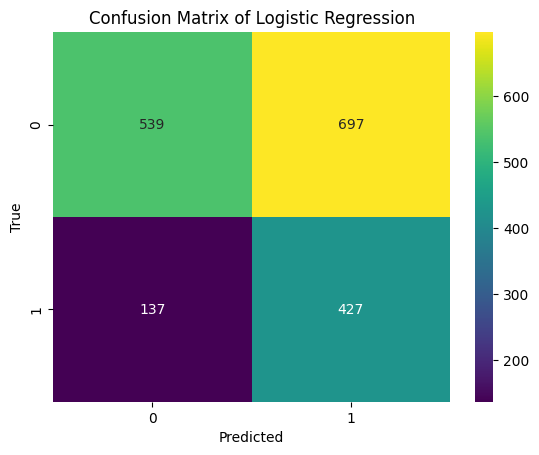

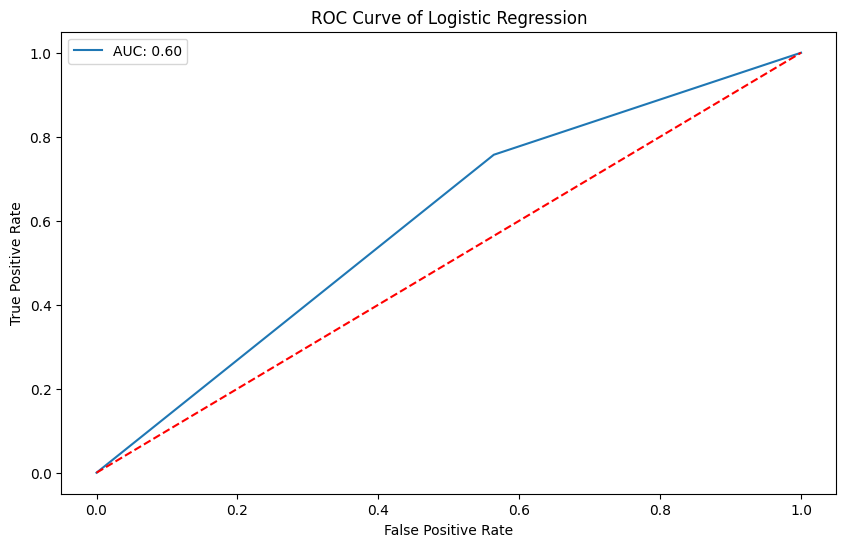

In [26]:
# roc auc curve painted of logistic regression
roc_auc_lr = roc_auc_score(y_test, y_pred)

# Confusion matrix of logistic regression
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# roc auc curve painted of logistic regression
roc_auc_lr

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()

In [27]:
def optimize_random_forest(trial):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 5000)
        max_depth = trial.suggest_int('max_depth', 10, 100)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 3)
        
        # Asignar pesos según el valor entero seleccionado
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        elif class_weight_option == 2:
            class_weight = {0: 1, 1: 2}
        elif class_weight_option == 3:
            class_weight = {0: 1, 1: 3}
        else:
            class_weight = {0: 1, 1: 5}
        
        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=-1,
            class_weight=class_weight
        )
        
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        
        # Calcular MCC
        mcc = matthews_corrcoef(y_val, y_pred)
        
        # Liberar memoria
        del rf
        gc.collect()
        
        return mcc
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')


In [28]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf.db', load_if_exists=True, study_name='RandomForest MCC', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_random_forest, n_trials=1)

# Guardar el mejor modelo encontrado
best_rf = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_rf.pkl')

# Imprimir los mejores parámetros
best_rf

[I 2024-06-05 10:47:12,057] Using an existing study with name 'RandomForest MCC' instead of creating a new one.
[I 2024-06-05 10:47:16,512] Trial 1002 finished with value: 0.2542749217425919 and parameters: {'n_estimators': 1885, 'max_depth': 38, 'min_samples_split': 78, 'min_samples_leaf': 92, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 0}. Best is trial 364 with value: 0.2631037847523167.


{'n_estimators': 2098,
 'max_depth': 23,
 'min_samples_split': 56,
 'min_samples_leaf': 89,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'class_weight': 0}

In [32]:
best_rf

{'n_estimators': 2098,
 'max_depth': 23,
 'min_samples_split': 56,
 'min_samples_leaf': 89,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'class_weight': 0}

In [33]:
study.best_value

0.2631037847523167

In [34]:
study = optuna.load_study(study_name='RandomForest MCC', storage='sqlite:///optuna_study_rf.db')

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [35]:
class_weight_option = best_rf['class_weight']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
elif class_weight_option == 2:
    class_weight = {0: 1, 1: 2}
elif class_weight_option == 3:
    class_weight = {0: 1, 1: 3}
else:
    class_weight = {0: 1, 1: 5}

best_rf.pop('class_weight')

rf = RandomForestClassifier(**best_rf,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.58      0.67      1236
         1.0       0.42      0.66      0.51       564

    accuracy                           0.61      1800
   macro avg       0.60      0.62      0.59      1800
weighted avg       0.67      0.61      0.62      1800



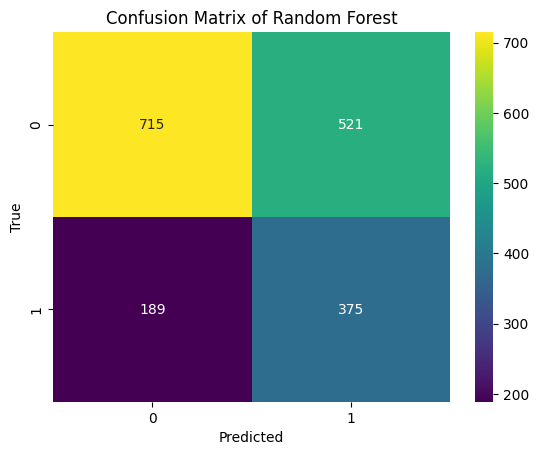

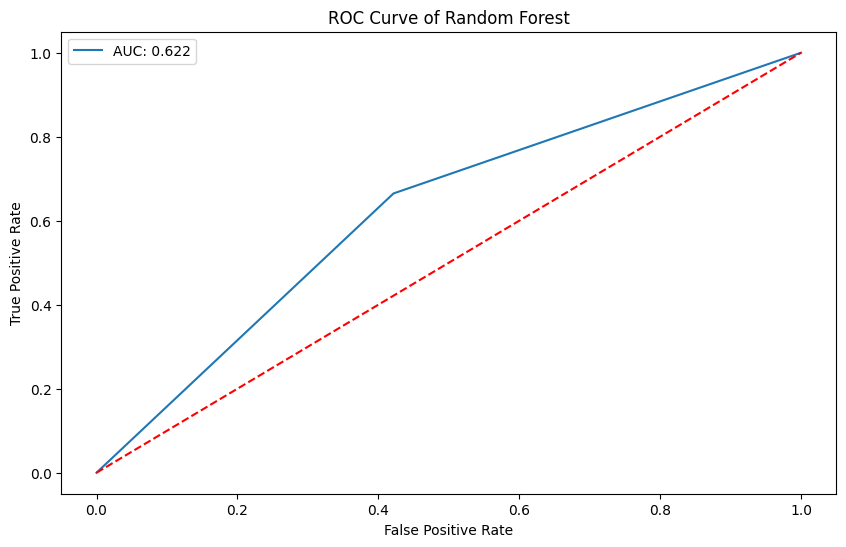

In [36]:
# roc auc curve painted of random forest
roc_auc_rf = roc_auc_score(y_test, y_pred)

# Confusion matrix of random forest
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# roc auc curve painted of random forest
roc_auc_rf

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend()

In [39]:
def optimize_xgboost(trial):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 500)
        max_depth = trial.suggest_int('max_depth', 1, 15)
        learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
        subsample = trial.suggest_float('subsample', 0.5, 0.9)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.9)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        
        xgb_model = xgb.XGBClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            learning_rate=learning_rate,
            booster=booster, 
            subsample=subsample, 
            colsample_bytree=colsample_bytree,
            random_state=42, 
            min_child_weight=min_child_weight, 
            n_jobs=-1
        )
        
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_val)
        
        # Calcular MCC
        mcc = matthews_corrcoef(y_val, y_pred)
        
        # Liberar memoria
        del xgb_model
        gc.collect()
        
        return mcc
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')

In [40]:
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb.db', load_if_exists=True, study_name='XGBoost MCC', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_xgboost, n_trials=1000)

# Guardar el mejor modelo encontrado
best_xgb = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_xgb.pkl')

# Imprimir los mejores parámetros
best_xgb

[I 2024-06-05 12:35:34,432] Using an existing study with name 'XGBoost MCC' instead of creating a new one.
[I 2024-06-05 12:36:05,640] Trial 379 finished with value: 0.2672528640708388 and parameters: {'n_estimators': 318, 'max_depth': 2, 'learning_rate': 0.008292887506319374, 'booster': 'dart', 'subsample': 0.6463842822812519, 'colsample_bytree': 0.583890973009923, 'min_child_weight': 5}. Best is trial 370 with value: 0.2724734409085053.
[I 2024-06-05 12:36:38,091] Trial 380 finished with value: 0.2201268351503605 and parameters: {'n_estimators': 312, 'max_depth': 10, 'learning_rate': 0.008576143372070768, 'booster': 'dart', 'subsample': 0.6682296143592957, 'colsample_bytree': 0.6481062657758844, 'min_child_weight': 5}. Best is trial 370 with value: 0.2724734409085053.
[I 2024-06-05 12:37:08,164] Trial 381 finished with value: 0.27232719285597845 and parameters: {'n_estimators': 314, 'max_depth': 2, 'learning_rate': 0.007855807755660756, 'booster': 'dart', 'subsample': 0.6784571027642

In [ ]:
study = optuna.load_study(study_name='XGBoost MCC', storage='sqlite:///optuna_study_xgb.db')

best_xgb = study.best_params

best_xgb

{'n_estimators': 208,
 'max_depth': 10,
 'learning_rate': 0.0014467783825263811,
 'booster': 'dart',
 'subsample': 0.6113335729317662,
 'colsample_bytree': 0.8513974274999044,
 'min_child_weight': 6}

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-05 10:46:46,826] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,826] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,828] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,828] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 2

In [ ]:
optuna.visualization.plot_slice(study)

[W 2024-06-05 10:46:52,330] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,330] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,332] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,332] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,333] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,333] Trial 2

In [ ]:
study.best_value

0.6535782322293374

In [ ]:
xgb_model = xgb.XGBClassifier(**best_xgb, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
type(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      1854
         1.0       0.43      0.53      0.48       846

    accuracy                           0.63      2700
   macro avg       0.60      0.61      0.60      2700
weighted avg       0.66      0.63      0.64      2700



str

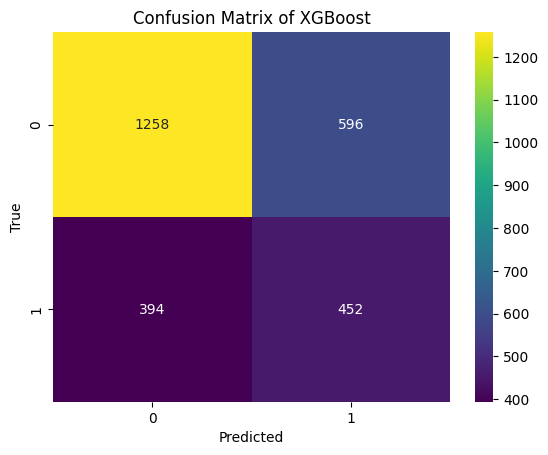

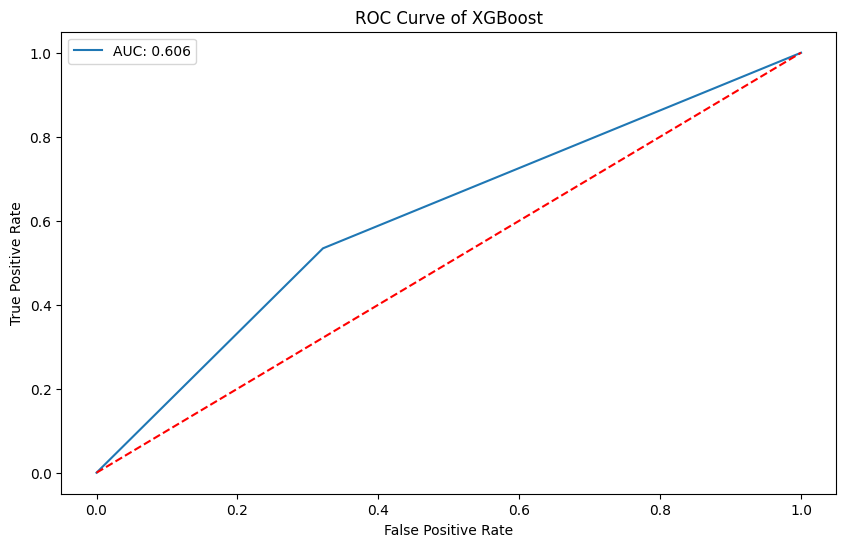

In [ ]:
roc_auc_xgb = roc_auc_score(y_test, y_pred)

cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.legend()
plt.show()

In [ ]:
%pip install optuna-integration

   ---------------------------------------- 0.0/93.4 kB ? eta -:--:--
   ---------------------------------------- 93.4/93.4 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
class MatthewsCorrelationCoefficient(keras.metrics.Metric):
    def __init__(self, name='matthews_corrcoef', **kwargs):
        super(MatthewsCorrelationCoefficient, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='tp', initializer='zeros')
        self.tn = self.add_weight(name='tn', initializer='zeros')
        self.fp = self.add_weight(name='fp', initializer='zeros')
        self.fn = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
        y_true = tf.cast(y_true, tf.float32)

        tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
        tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
        fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
        fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

        self.tp.assign_add(tp)
        self.tn.assign_add(tn)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        numerator = self.tp * self.tn - self.fp * self.fn
        denominator = tf.sqrt((self.tp + self.fp) * (self.tp + self.fn) * (self.tn + self.fp) * (self.tn + self.fn))
        return tf.math.divide_no_nan(numerator, denominator)

    def reset_states(self):
        for v in self.variables:
            v.assign(0)

In [ ]:
def optimize_nn(trial):
    try:
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 500)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 500)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 500)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 500)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 500)
        else:
            neurons_fifth_layer = 0

        early_stopping = keras.callbacks.EarlyStopping(monitor='val_matthews_corrcoef', patience=10, restore_best_weights=True, mode='max')
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy', 'hinge', 'squared_hinge', 'binary_focal_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 256)
        learning_rate = trial.suggest_float('learning_rate', 1e-7, 1e-2, log=True)

        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(learning_rate=learning_rate)

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)

        # Crear el modelo
        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dropout(0.2))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dropout(0.2))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dropout(0.2))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dropout(0.2))
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dropout(0.2))
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))

        # Compilar el modelo
        nn.compile(optimizer=opt, loss=loss, metrics=[MatthewsCorrelationCoefficient()])

        # Ajustar el modelo
        nn.fit(X_train, y_train, batch_size=batch_size, epochs=900, validation_data=(X_val, y_val),
               callbacks=[early_stopping, optuna.integration.TFKerasPruningCallback(trial, 'val_matthews_corrcoef')], verbose=0)

        # Predecir y calcular las métricas en el conjunto de prueba
        y_pred = (nn.predict(X_test) > 0.5).astype('int32').reshape(-1)
        mcc = matthews_corrcoef(y_test, y_pred)
        
        logging.info(classification_report(y_test, y_pred))
        del nn
        gc.collect()

        # Devolver el MCC
        return mcc
    except Exception as e:
        logging.error(f"Optimization error: {e}")
        return float('-inf')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn.db', load_if_exists=True, study_name='Neural Network AUC', pruner=pruner)

study.optimize(optimize_nn, n_trials=500)

best_nn = study.best_params

joblib.dump(study, 'optuna_study_nn.pkl')

best_nn

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\optuna_integration\tfkeras.py:53: UserWarning: The metric 'val_auc' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\optuna_integration\tfkeras.py:53: UserWarning: The metric 'val_auc' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\optuna_integration\tfkeras.py:53: UserWarning: The metric 'val_auc' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\optuna_integration\tfkeras.py:53: UserWarning: The metric 'val_auc' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step


d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\optuna_integration\tfkeras.py:53: UserWarning: The metric 'val_auc' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)


KeyboardInterrupt: 

In [ ]:
study.best_value

0.619368128715371

In [ ]:
study = optuna.load_study(study_name='Neural Network AUC', storage='sqlite:///optuna_study_nn.db')

best_nn = study.best_params

best_nn

{'neurons_first_layer': 245,
 'neurons_second_layer': 192,
 'neurons_third_layer': 277,
 'add_fourth_layer': False,
 'add_fifth_layer': False,
 'activation': 'tanh',
 'optimizer': 'rmsprop',
 'loss': 'binary_crossentropy',
 'batch_size': 70,
 'learning_rate': 1.7051723850954375e-05}

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-05 10:46:46,826] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,826] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,827] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,828] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,828] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:46,829] Trial 2

In [ ]:
optuna.visualization.plot_slice(study)

[W 2024-06-05 10:46:52,330] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,330] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,331] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,332] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,332] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,333] Trial 18 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-05 10:46:52,333] Trial 2

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(best_nn['neurons_first_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(best_nn['neurons_second_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(best_nn['neurons_third_layer'], activation=best_nn['activation']))
if best_nn['add_fourth_layer']:
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(best_nn['neurons_fourth_layer'], activation=best_nn['activation']))
if best_nn['add_fifth_layer']:
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(best_nn['neurons_fifth_layer'], activation=best_nn['activation']))
model.add(keras.layers.Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_matthews_corrcoef', patience=10, restore_best_weights=True, mode='max')
opt = keras.optimizers.Adam(learning_rate=best_nn['learning_rate'])

model.compile(optimizer=opt, loss=best_nn['loss'], metrics=[MatthewsCorrelationCoefficient()])

model.fit(X_train, y_train, batch_size=best_nn['batch_size'], epochs=900, validation_data=(X_val, y_val),
          callbacks=[early_stopping], verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype('int32').reshape(-1)
print(classification_report(y_test, y_pred))

Epoch 1/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6241 - loss: 0.6728 - val_AUC: 0.6792 - val_loss: 0.6525
Epoch 2/900
118/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6485 - loss: 0.6590

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6515 - loss: 0.6581 - val_AUC: 0.6797 - val_loss: 0.6524
Epoch 3/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6576 - loss: 0.6561 - val_AUC: 0.6815 - val_loss: 0.6493
Epoch 4/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6594 - loss: 0.6556 - val_AUC: 0.6816 - val_loss: 0.6477
Epoch 5/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6549 - loss: 0.6577 - val_AUC: 0.6813 - val_loss: 0.6501
Epoch 6/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6570 - loss: 0.6556 - val_AUC: 0.6819 - val_loss: 0.6507
Epoch 7/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6578 - loss: 0.6541 - val_AUC: 0.6838 - val_loss: 0.6466
Epoch 8/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6632 - loss: 0.6517 - val_AUC: 0.6837 - val_loss: 0.6477
Epoch 9/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6633 - loss: 0.6520 - val_AUC: 0.6826 - val_loss: 0.6497
Epoch 10/900
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC:

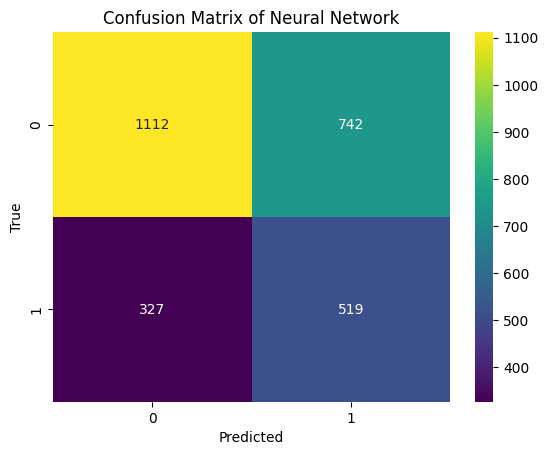

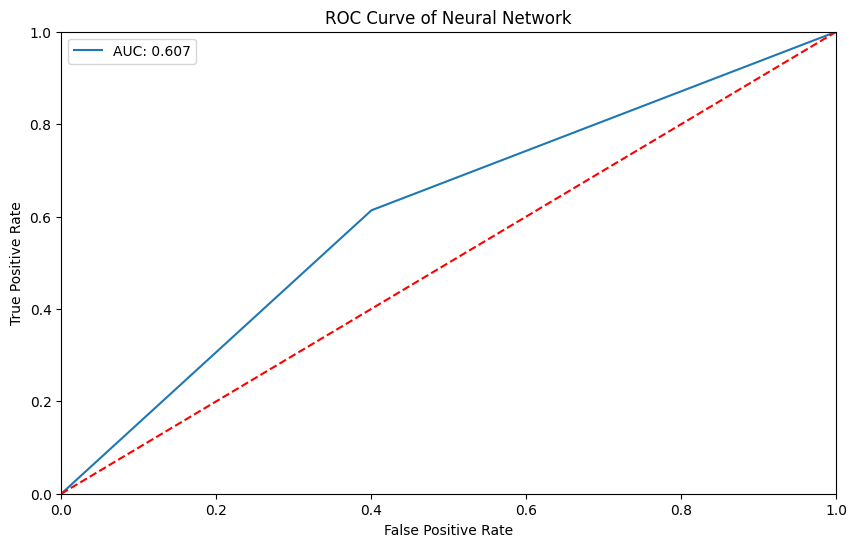

In [ ]:
roc_auc_nn = roc_auc_score(y_test, y_pred)

cm_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nn, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network')
plt.show()

roc_auc_nn

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network')
plt.legend()
plt.show()